# **Project Description :**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

[<img alt="Machine Learning Project: Predicting Boston House Prices With ..." class="n3VNCb" src="https://miro.medium.com/max/402/1*2foyXif7hwkO8wWB5T9KtQ.png" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 900px; height: 400px; margin: 0px;">]

### Link for Data Description and Data Set :
Data overview : [https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview]  
Data description/ download : [https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data]

## Approach note
Machine Learning Model for kaggle Compitetion.   
**Objective: Will build a Model to predict the sale price for the house based on their attributes/features.**  

The following cycle/stage will be covered during this analysis. 
* Data loading
* Data Preprocessing (Analysis and feature engneering)
    1. Missing values analysis.
    2. Outliers/extream values analysis.
    3. Variables distribution analysis. (For : Numerical, Ordinal, Nominal and categorical)
    4. Independent Variables relationship. (Bivariate and multivariate analysis)
    5. Relationship between predictor and response variables.
* Feature selection
* Model Building
* Model Evaluation 

# Required Libraries :

In [76]:
#data preprocessing
import pandas as pd         #for dataframe 
import numpy as np          #for linear algebra

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Showing Working directory for files
import os
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [77]:
f = open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt','r')
#print(f.read())

# Importing Data Set :

In [78]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
print("Total rows :" , df.shape[0])
print("Total columns :" , df.shape[1])

Total rows : 1460
Total columns : 81


# Univariate Analysis :

In [79]:
#Setting the no of rows to displays in result
pd.set_option('display.max_rows',df.shape[1]+1)   

#Head of the data in transpose form
df.head().T 

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [80]:
#Columns name of the data
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [81]:
#For Basic summary statistics :
pd.set_option('display.max_rows',df.shape[1]+1)
df.describe().T

#Summary statistics in long form.

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [82]:
#Info about the data : variables names and their data type and non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Form above info, there are three different type of features.
* Object : total 43 variables
* int64 : total 35 variables
* float64 : total 64 variables  
Also there are missing values are in some of the variables as non_null count of variable is less than total rows.


Also some of the variables are misclassified as numerical with int64 datatype, have to convert them in categorical variables and date.

In [83]:
int_to_obj = []
for i in df.columns:
    if df.loc[:,i].dtype == 'int64':
        if len(df.loc[:,i].unique()) < 15:
            print(i)
            print(len(df.loc[:,i].unique()))
            int_to_obj.append(i)

date_var = ['MoSold','YrSold','YearRemodAdd','YearBuilt'] 
int_to_obj = set(int_to_obj) - set(date_var)   #check this
int_to_obj = ['MSSubClass','OverallQual','OverallCond','GarageCars']
for i in int_to_obj:
    df[i] = df[i].astype(object)

OverallQual
10
OverallCond
9
BsmtFullBath
4
BsmtHalfBath
3
FullBath
4
HalfBath
3
BedroomAbvGr
8
KitchenAbvGr
4
TotRmsAbvGrd
12
Fireplaces
4
GarageCars
5
PoolArea
8
MoSold
12
YrSold
5


In [84]:
#droping the id columns
df = df.drop('Id',axis = 1)

## Missing Values Treatment :

In [85]:
#Total no of missing values
df.isna().sum().sum()

6965

In [86]:
#Variables which have missing values
dict = {"variable" : [],"Count" : []}
for var in df.columns:
   if df.loc[:,var].isna().sum() > 0:
    #print(var,":",df.loc[:,var].isna().sum())
    dict["variable"].append(var)
    dict["Count"].append(df.loc[:,var].isna().sum())
#Making data frame and sorting them
mis_data = pd.DataFrame(dict).sort_values('Count',ascending =  False)
mis_data.style.background_gradient(cmap = 'Blues')

,variable,Count
16,PoolQC,1453
18,MiscFeature,1406
1,Alley,1369
17,Fence,1179
10,FireplaceQu,690
0,LotFrontage,259
11,GarageType,81
12,GarageYrBlt,81
13,GarageFinish,81
14,GarageQual,81


In [87]:
#Visualization
mis_plot = px.bar(mis_data.sort_values('Count'),x = 'Count',y = 'variable',
            color= 'Count',orientation= 'h',height=700,width=850,title= "Missing Value")
mis_plot.show()

There are some of numerical variables and categorical variables having missing values.  

Let's handle them....

In [88]:
df[list(mis_data['variable'])].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   FireplaceQu   770 non-null    object 
 5   LotFrontage   1201 non-null   float64
 6   GarageType    1379 non-null   object 
 7   GarageYrBlt   1379 non-null   float64
 8   GarageFinish  1379 non-null   object 
 9   GarageQual    1379 non-null   object 
 10  GarageCond    1379 non-null   object 
 11  BsmtExposure  1422 non-null   object 
 12  BsmtFinType2  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  BsmtQual      1423 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  MasVnrType    1452 non-null   object 
 18  Electrical    1459 non-null 

So, variables have missing values are:
* Numeric = 3 : MasVnrArea, GarageYrBlt and LotFrontage
* categorical = 16 : restof variables in mis_data except above three

### *First : Numerical Variables*

      variable  Miss_count  Miss_prop         mean  median      skew
0  LotFrontage         259   0.177397    70.049958    69.0  2.163569
1  GarageYrBlt          81   0.055479  1978.506164  1980.0 -0.649415
2   MasVnrArea           8   0.005479   103.685262     0.0  2.669084


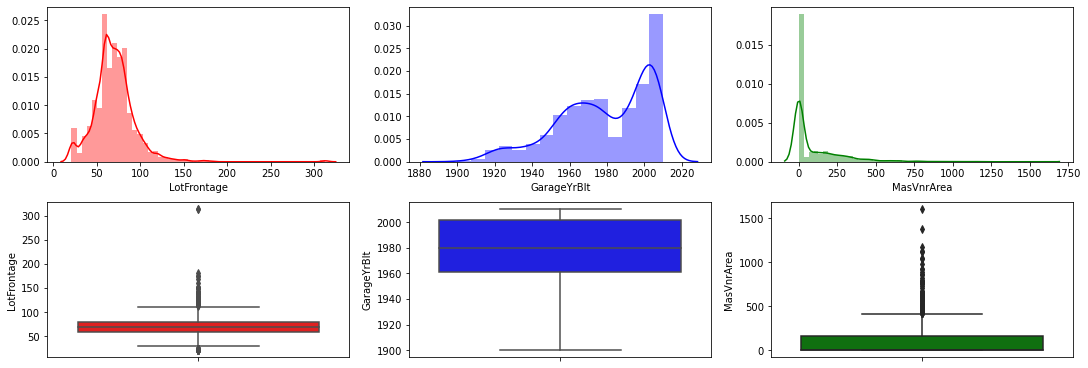

In [89]:
#Missing inputation : 
dict1 = {"variable" : [],"Miss_count" : [],"Miss_prop" : [],"mean" : [],"median" : [],"skew":[]}
for var in mis_data.variable:
    if df[var].dtype == 'float64':
        dict1["variable"].append(var)
        dict1["Miss_count"].append(df[var].isna().sum())
        dict1["Miss_prop"].append(df[var].isna().sum()/df.shape[0])
        dict1["mean"].append(df[var].mean())
        dict1["median"].append(df[var].median())
        dict1['skew'].append(df[var].skew())
print(pd.DataFrame(dict1))

#Adjustment for gridSpace
from matplotlib.gridspec import GridSpec

#Size of plots
fig = plt.figure(constrained_layout = True,figsize = (15,5))
gs = GridSpec(2, 3, figure=fig)     #No of grid and plots positions

#Distribution plot
i = 0
col = ['red','blue','green']
for var in list(dict1["variable"]):
    plt.subplot(gs[0,i])
    sns.distplot(df[var],color= col[i])
    i= i+1

#Boxplot
i = 0
for var in list(dict1["variable"]):
    plt.subplot(gs[1,i])
    sns.boxplot(df[var],color = col[i],orient='v')
    i= i+1

Since the mean values of variable is affected by outliers/ extream values, hence it will be a good choice to use median to replace missing values in numeric variable. Which is justified by skewness values and outliers in boxplot,  
1. if the skewness = 0 , symetric distributed.
2. if skewness < 0 , negative skewed or left skewed.
3. if skewness > 0 , positive skewed or right skewed.   
In above plots the two are positive skewed except "GarageYrBlt" var and it's left skewed. As we can see in ManVnrArea plot how the mean (central tendency) value is affecting by longer right tail/skewness.
So we will replace NA's in numeric data with median values.

In [90]:
#Repalcement of NA's
for var in mis_data.variable:
    if df[var].dtype == 'float64':
        df[var] = df[var].fillna(df[var].median())
        

### *Second : Categorical Variables*

In [91]:
#Missing inputation : 
dict2 = {"variable" : [],"Miss_count" : [],"Miss_prop" : [],"mode" : [],"mode_freq" : []}
for var in mis_data.variable:
    if df[var].dtype == 'object':
        dict2["variable"].append(var)
        dict2["Miss_count"].append(df[var].isna().sum())
        dict2["Miss_prop"].append(df[var].isna().sum()/df.shape[0])
        dict2["mode"].append(df[var].value_counts().index[0])
        dict2["mode_freq"].append(df[var].value_counts().values[0])
print(pd.DataFrame(dict2))


        variable  Miss_count  Miss_prop    mode  mode_freq
0         PoolQC        1453   0.995205      Gd          3
1    MiscFeature        1406   0.963014    Shed         49
2          Alley        1369   0.937671    Grvl         50
3          Fence        1179   0.807534   MnPrv        157
4    FireplaceQu         690   0.472603      Gd        380
5     GarageType          81   0.055479  Attchd        870
6   GarageFinish          81   0.055479     Unf        605
7     GarageQual          81   0.055479      TA       1311
8     GarageCond          81   0.055479      TA       1326
9   BsmtExposure          38   0.026027      No        953
10  BsmtFinType2          38   0.026027     Unf       1256
11  BsmtFinType1          37   0.025342     Unf        430
12      BsmtCond          37   0.025342      TA       1311
13      BsmtQual          37   0.025342      TA        649
14    MasVnrType           8   0.005479    None        864
15    Electrical           1   0.000685   SBrkr       13

* Since, there are 4 variables having missing values more than 70%, hence will drop these columns.   
* Also there are 5 variables having the information about Basement features as "BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual" and also have same count of missing values.  
* Also there are 4 variables having the information about Garage features as  "GarageType","GarageFinish","GarageQual","GarageCond"


In [92]:
df.drop(["PoolQC","MiscFeature","Alley","Fence"],axis = 1,inplace=True)

In [93]:
#Checking the Basement fetures
df[df["BsmtCond"].isnull()][["BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual",
   'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0


Since, in basement features, where there are NA's all other info about basement is 0. It means there is no basement in house. So will fill with Category as : "No Basement"

In [94]:
basement_features= ["BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual"]
for var in basement_features:
    df[var] = df[var].fillna("No Basement")

In [95]:
#Checking the garage features
df[df["GarageType"].isnull()][["GarageType","GarageFinish","GarageQual","GarageCond",
             'GarageYrBlt','GarageCars', 'GarageArea']]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,1980.0,0,0
48,NaN,NaN,NaN,NaN,1980.0,0,0
78,NaN,NaN,NaN,NaN,1980.0,0,0
88,NaN,NaN,NaN,NaN,1980.0,0,0
89,NaN,NaN,NaN,NaN,1980.0,0,0
99,NaN,NaN,NaN,NaN,1980.0,0,0
108,NaN,NaN,NaN,NaN,1980.0,0,0
125,NaN,NaN,NaN,NaN,1980.0,0,0
127,NaN,NaN,NaN,NaN,1980.0,0,0
140,NaN,NaN,NaN,NaN,1980.0,0,0


As there are 81 missing values are in garage variables and also other garage featutes are zero and we do not have the info about that. So we will fill it by "No Garage" and fill with mode.

In [96]:
garage_features = ["GarageType","GarageFinish","GarageQual","GarageCond"]
for var in garage_features:
    df[var] = df[var].fillna("No Garage")

In [97]:
#For fire features
df[df["FireplaceQu"].isna()][["Fireplaces","FireplaceQu"]]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


Since there is no fire place for 690 case will replaced Na's with "No fire" category. And for "MasVnrType","Electrical" will use mode to fill it.

In [98]:
df['FireplaceQu'].fillna("No Fire",inplace = True)
df["MasVnrType"].fillna(df["MasVnrType"].value_counts().index[0],inplace = True)
df["Electrical"].fillna(df["Electrical"].value_counts().index[0],inplace = True)

In [99]:
#Sanity Check : Whether there is any remaining NA's are not. 
df.isna().sum().sum()

0

**So, there are no more NA's in the data.**

* Now will check for **Test data** set and take required columns.


In [100]:
print("Total Columns in Train data set:",df.shape[1])
#Loading Test data set
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
print("Total rows :" , test_df.shape[0])
print("Total columns :" , test_df.shape[1])

Total Columns in Train data set: 76
Total rows : 1459
Total columns : 80


In [101]:
#First will take only those columns presnt in train data set.
col_in_train = df.columns.tolist()
test_df = test_df[list(set(col_in_train) - set(["SalePrice"]))]
print("train shape",df.shape)
print("test shape",test_df.shape)

train shape (1460, 76)
test shape (1459, 75)


**Will check the NA's in Test data set.**

In [102]:
#Displaying Side By Side Data frame
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [103]:
#Over all 
print("Over all NA's Count in test = ",test_df.isna().sum().sum())
mis_data_test = {"Variables" : [],"Count" : [],"dtype":[]}
for var in test_df.columns:
    if test_df.loc[:,var].isna().sum() > 0:
        mis_data_test["Variables"].append(var)
        mis_data_test["Count"].append(test_df.loc[:,var].isna().sum())
        mis_data_test["dtype"].append(test_df[var].dtype)
mis_data_test = pd.DataFrame(mis_data_test).sort_values("Count",ascending= False)

#Missing Info in train and test
print("No of variables having Missing values in Train data set = ",mis_data.shape[0])
print("No of variables having Missing values in Test data set = ",mis_data_test.shape[0])
com_var = list(set(mis_data['variable']).intersection(set(mis_data_test['Variables'])))
print("No of comman variables in both = ",len(com_var))
new_var = list(set(mis_data_test['Variables']) - set(mis_data['variable']))
print("No of new variable having NA's = ",len(new_var))

#will show side by side variables missing df for train and test
display_side_by_side(mis_data.reset_index(),mis_data_test.reset_index(),
                     mis_data_test.loc[mis_data_test["Variables"].isin(new_var),].reset_index())

mis_data_test.dtype.value_counts()

Over all NA's Count in test =  1615
No of variables having Missing values in Train data set =  19
No of variables having Missing values in Test data set =  29
No of comman variables in both =  14
No of new variable having NA's =  15


,index,variable,Count
0,16,PoolQC,1453
1,18,MiscFeature,1406
2,1,Alley,1369
3,17,Fence,1179
4,10,FireplaceQu,690
5,0,LotFrontage,259
6,11,GarageType,81
7,12,GarageYrBlt,81
8,13,GarageFinish,81
9,14,GarageQual,81


object     18
float64    11
Name: dtype, dtype: int64

* So, There are total 15 extra variable having missing values as their count of NA's are less so will replace NA's with mode for Categorical and median for numerical variables.  
* And will replace in comman variables with same logic as applied for train.
* Also there are 18 categorical variables and 11 numerical variables.

In [104]:
#[1] For numerical variables
var_done = []
for var in mis_data_test.Variables:
    if test_df[var].dtype == 'float64':
        test_df[var] = test_df[var].fillna(test_df[var].median())
        var_done.append(var)
print(len(var_done))
#[2] Same treatment for matching categorical variables.
#[a] basement features
for var in list(set(basement_features).intersection(set(mis_data_test.Variables))):
    test_df[var] = test_df[var].fillna("No Basement")
    var_done.append(var)
print(len(var_done))
#[b] garage features
for var in list(set(garage_features).intersection(set(mis_data_test.Variables))):
    test_df[var] = test_df[var].fillna("No Garage")
    var_done.append(var)
print(len(var_done))
#[c] others
test_df['FireplaceQu'].fillna("No Fire",inplace = True)
test_df["MasVnrType"].fillna(test_df["MasVnrType"].value_counts().index[0],inplace = True)
var_done.extend(['FireplaceQu',"MasVnrType"])
print(len(var_done))
#Remaining Variables
remain_var = set(mis_data_test.Variables) - set(list(var_done))

print("Remaing variables : ","\n",mis_data_test[mis_data_test.Variables.isin(remain_var)])

11
16
20
22
Remaing variables :  
       Variables  Count   dtype
25     MSZoning      4  object
15   Functional      2  object
11    Utilities      2  object
12     SaleType      1  object
23  Exterior1st      1  object
21  KitchenQual      1  object
8   Exterior2nd      1  object


* Have replaced the NA's of variables (mathcing with trainning data set).
* will replaced remaining categorical variables with mode.

In [105]:
print(len(var_done))
for var in remain_var:
    test_df[var].fillna(test_df[var].value_counts().index[0],inplace= True)
    var_done.append(var)
print("Total no of var for which replacement is done : ",len(var_done))
print("Total no of remainning var having NA's :",mis_data_test.shape[0]- len(var_done))
print("\n","Total no of NA's in Train : ",df.isna().sum().sum())
print("\n","Total no of NA's in Test : ",test_df.isna().sum().sum())

22
Total no of var for which replacement is done :  29
Total no of remainning var having NA's : 0

 Total no of NA's in Train :  0

 Total no of NA's in Test :  0


**Now there is no Na's in trainning and testing data set.**

In [106]:
#Converting some  of int to object
int_to_obj = ['MSSubClass','OverallQual','OverallCond','GarageCars']
for var in int_to_obj:
    test_df[var] = test_df[var].astype(object)

### Traget variable in trainning Data set.

In [107]:
print("Summary : \n",df['SalePrice'].describe())
print("\n Skewness of Sale Price Data = ",df['SalePrice'].skew())
print("\n Median of Sale Price Data = ",df['SalePrice'].median())

Summary : 
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

 Skewness of Sale Price Data =  1.8828757597682129

 Median of Sale Price Data =  163000.0


* The saleprice have values in between **34,900** and **75,50,00**. 
* Its mean value is **1,80,921**. Also data is right skewed.
* And median value is **1,63,000**, which is less than the mean value.

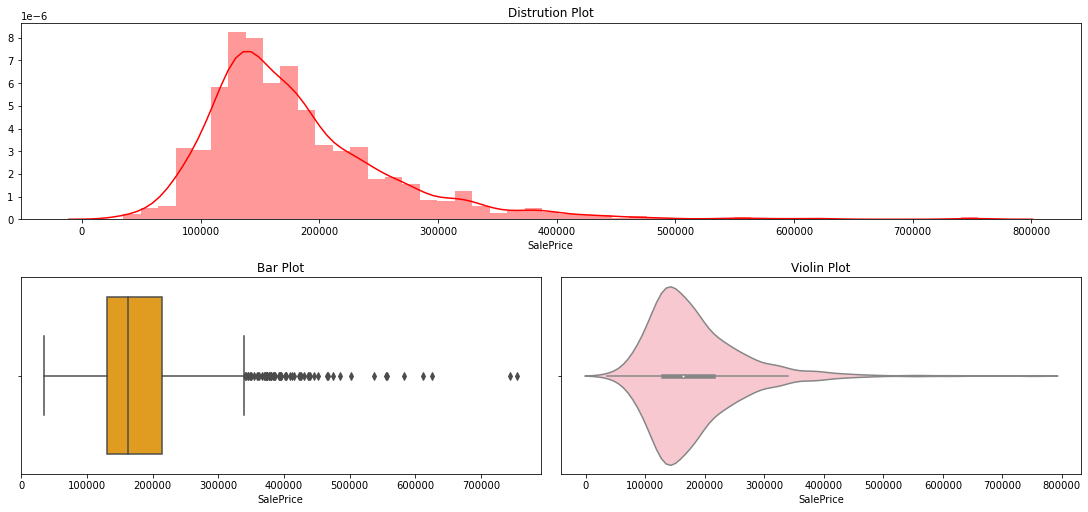

In [108]:
#Visualization.
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout = True, figsize = (15,7))
gs = GridSpec(2,2,figure=fig)
plt.subplot(gs[0,:])
sns.distplot(df['SalePrice'],color="red",)      #Distribution plot
plt.title("Distrution Plot")
plt.subplot(gs[1,0])
sns.boxplot(df['SalePrice'],color="orange",orient='h')   #Boxplot
plt.title("Bar Plot")
plt.subplot(gs[1,1])
sns.violinplot(df['SalePrice'],color = "pink")           #Violin
plt.title("Violin Plot")
plt.show()

# Bivariate Analysis :
**We can check the degree of relationship of independent variables and dependent variable with some visual plots and with some of statistical metric.**
* Will divide the features into two subsets one for numerical features and another for categorical features.
* Since numerical varibles of two type continuous and discrete, will consider discrete as categorical variables.

In [109]:
print("Total No of Var in Train = ",df.shape[1])
#Categorical Variables
cat_var = df.select_dtypes(include = "object")
print("Total No of categorical variables = ", cat_var.shape[1])

#Numerical Variables
num_int_date_var = df.select_dtypes(exclude = "object")
print("Total No of num_int_date variables = ", num_int_date_var.shape[1])

#Date variables
date_var = df[['MoSold', 'YrSold', 'YearRemodAdd', 'YearBuilt','GarageYrBlt']]
print("Total No of date variables = ",date_var.shape[1])

#Integer variables which have unique less than 15 values : descrete
desc_var = []
for var in num_int_date_var:
    if df[var].dtypes == 'int64' and var not in list(date_var.columns) and len(df[var].unique()) < 15:
        desc_var.append(var)
desc_var = df[desc_var]
print("Total No of descrete Variables = ",desc_var.shape[1])

#Actual Continuous variables
con_var = set(num_int_date_var.columns) - set(date_var.columns) - set(desc_var.columns)
con_var = df[con_var]
print("Total No of Countinuous Variables = ",con_var.shape[1])

Total No of Var in Train =  76
Total No of categorical variables =  43
Total No of num_int_date variables =  33
Total No of date variables =  5
Total No of descrete Variables =  9
Total No of Countinuous Variables =  19


**So, Basically there are 43 categorical, 4 date, 9 descrete and 20 continuous variables. And will proceed analysis as below**
* Categorical var: will plot bar plot,box plot and distribution plot with saleprice.
* Date var : will plot bar and trend plot with saleprice.
* Descrete var: will treat same as categorical var with sale price.
* Continuous var : will check correlation metric with saleprice.


### 1. Categorical Variables & Sale price

In [110]:
cat_var.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### CAT_A : MSSubClass = Identifies the type of dwelling involved in the sale.

In [111]:
#First convert the meaning description of int values:
print("Unique Values: ", df["MSSubClass"].unique())
replace_dict = {
        20 : '1-STORY 1946 & NEWER ALL STYLES',
        30: '1-STORY 1945 & OLDER',
        40: '1-STORY W/FINISHED ATTIC ALL AGES',
        45: '1-1/2 STORY - UNFINISHED ALL AGES',
        50: '1-1/2 STORY FINISHED ALL AGES',
        60: '2-STORY 1946 & NEWER',
        70: '2-STORY 1945 & OLDER',
        75: '2-1/2 STORY ALL AGES',
        80: 'SPLIT OR MULTI-LEVEL',
        85: 'SPLIT FOYER',
        90: 'DUPLEX - ALL STYLES AND AGES',
       120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150: '1-1/2 STORY PUD - ALL AGES',
       160: '2-STORY PUD - 1946 & NEWER',
       180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}
cat_var["MSSubClass"] = cat_var["MSSubClass"].replace(replace_dict)
print("Unique Values: ", cat_var["MSSubClass"].unique())
#For over all data frame
df["MSSubClass"] = df["MSSubClass"].replace(replace_dict)
#For test
test_df["MSSubClass"] = test_df["MSSubClass"].replace(replace_dict)

Unique Values:  [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
Unique Values:  ['2-STORY 1946 & NEWER' '1-STORY 1946 & NEWER ALL STYLES'
 '2-STORY 1945 & OLDER' '1-1/2 STORY FINISHED ALL AGES'
 '2 FAMILY CONVERSION - ALL STYLES AND AGES'
 '1-1/2 STORY - UNFINISHED ALL AGES' 'DUPLEX - ALL STYLES AND AGES'
 '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
 '1-STORY 1945 & OLDER' 'SPLIT FOYER' 'SPLIT OR MULTI-LEVEL'
 '2-STORY PUD - 1946 & NEWER' '2-1/2 STORY ALL AGES'
 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
 '1-STORY W/FINISHED ATTIC ALL AGES']


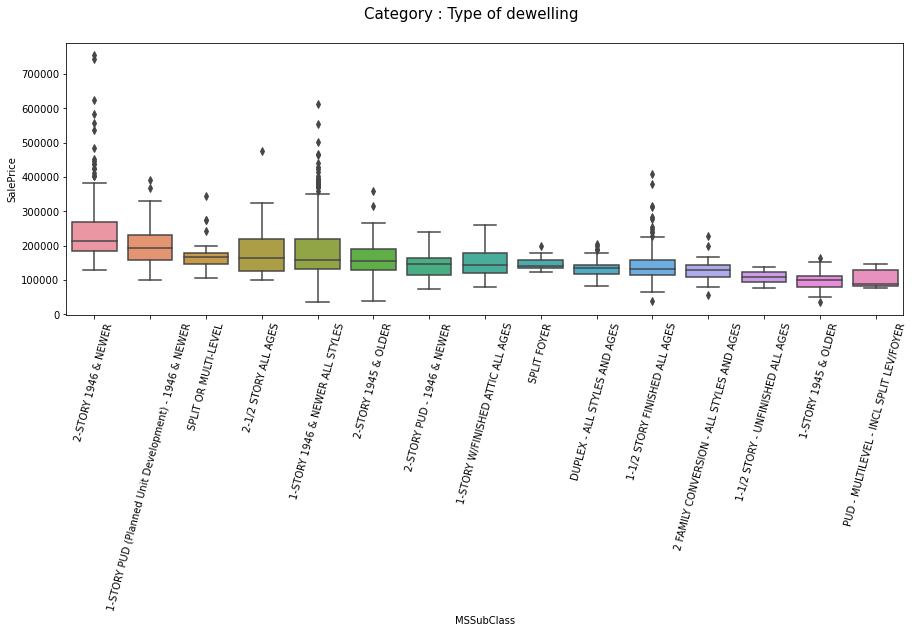

In [112]:
fig = plt.figure(figsize = (15,5))
#to order this need refrence table
tab = df.groupby(['MSSubClass'],as_index = False)['SalePrice'].median().sort_values("SalePrice",ascending=False)
mx = sns.boxplot(x = cat_var['MSSubClass'], y = df['SalePrice'],order = tab.MSSubClass)
mx.set_xticklabels(mx.get_xticklabels(),rotation = 75)
fig.suptitle("Category : Type of dewelling",fontsize = 15)
fig.show()

* Since these plots are in decsending order of median from left to right, so we can see that avg sale price is quite high in left categories of type of dewelling.
* And There are non-uniformity of the sale price as we can see the size of box plot.

In [113]:
import warnings
warnings.filterwarnings('ignore')
tab = df.groupby(['MSSubClass'])['MSSubClass','SalePrice'].agg({'MSSubClass':'count','SalePrice':'median'})
tab.sort_values('SalePrice',ascending = False).style.background_gradient(cmap = 'Reds')


,MSSubClass,SalePrice
MSSubClass,,
2-STORY 1946 & NEWER,299,215200
1-STORY PUD (Planned Unit Development) - 1946 & NEWER,87,192000
SPLIT OR MULTI-LEVEL,58,166500
2-1/2 STORY ALL AGES,16,163500
1-STORY 1946 & NEWER ALL STYLES,536,159250
2-STORY 1945 & OLDER,60,156000
2-STORY PUD - 1946 & NEWER,63,146000
1-STORY W/FINISHED ATTIC ALL AGES,4,142500
SPLIT FOYER,20,140750


* We can see the Saleprice of 2-story and 1-story Pud is quiet high.
* some of sub categories of 1-story have less sales values.
* this variables have non-uniformity of sale price in sub categories, therefore it is a good variables to predict sale price.

### CAT_b : Structure of Land and Property
* MSZoning: The general zoning classification
* Street: Type of road access
* LotShape: General shape of property
* LandContour: Flatness of the property
* LotConfig: Lot configuration
* LandSlope: Slope of property

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']


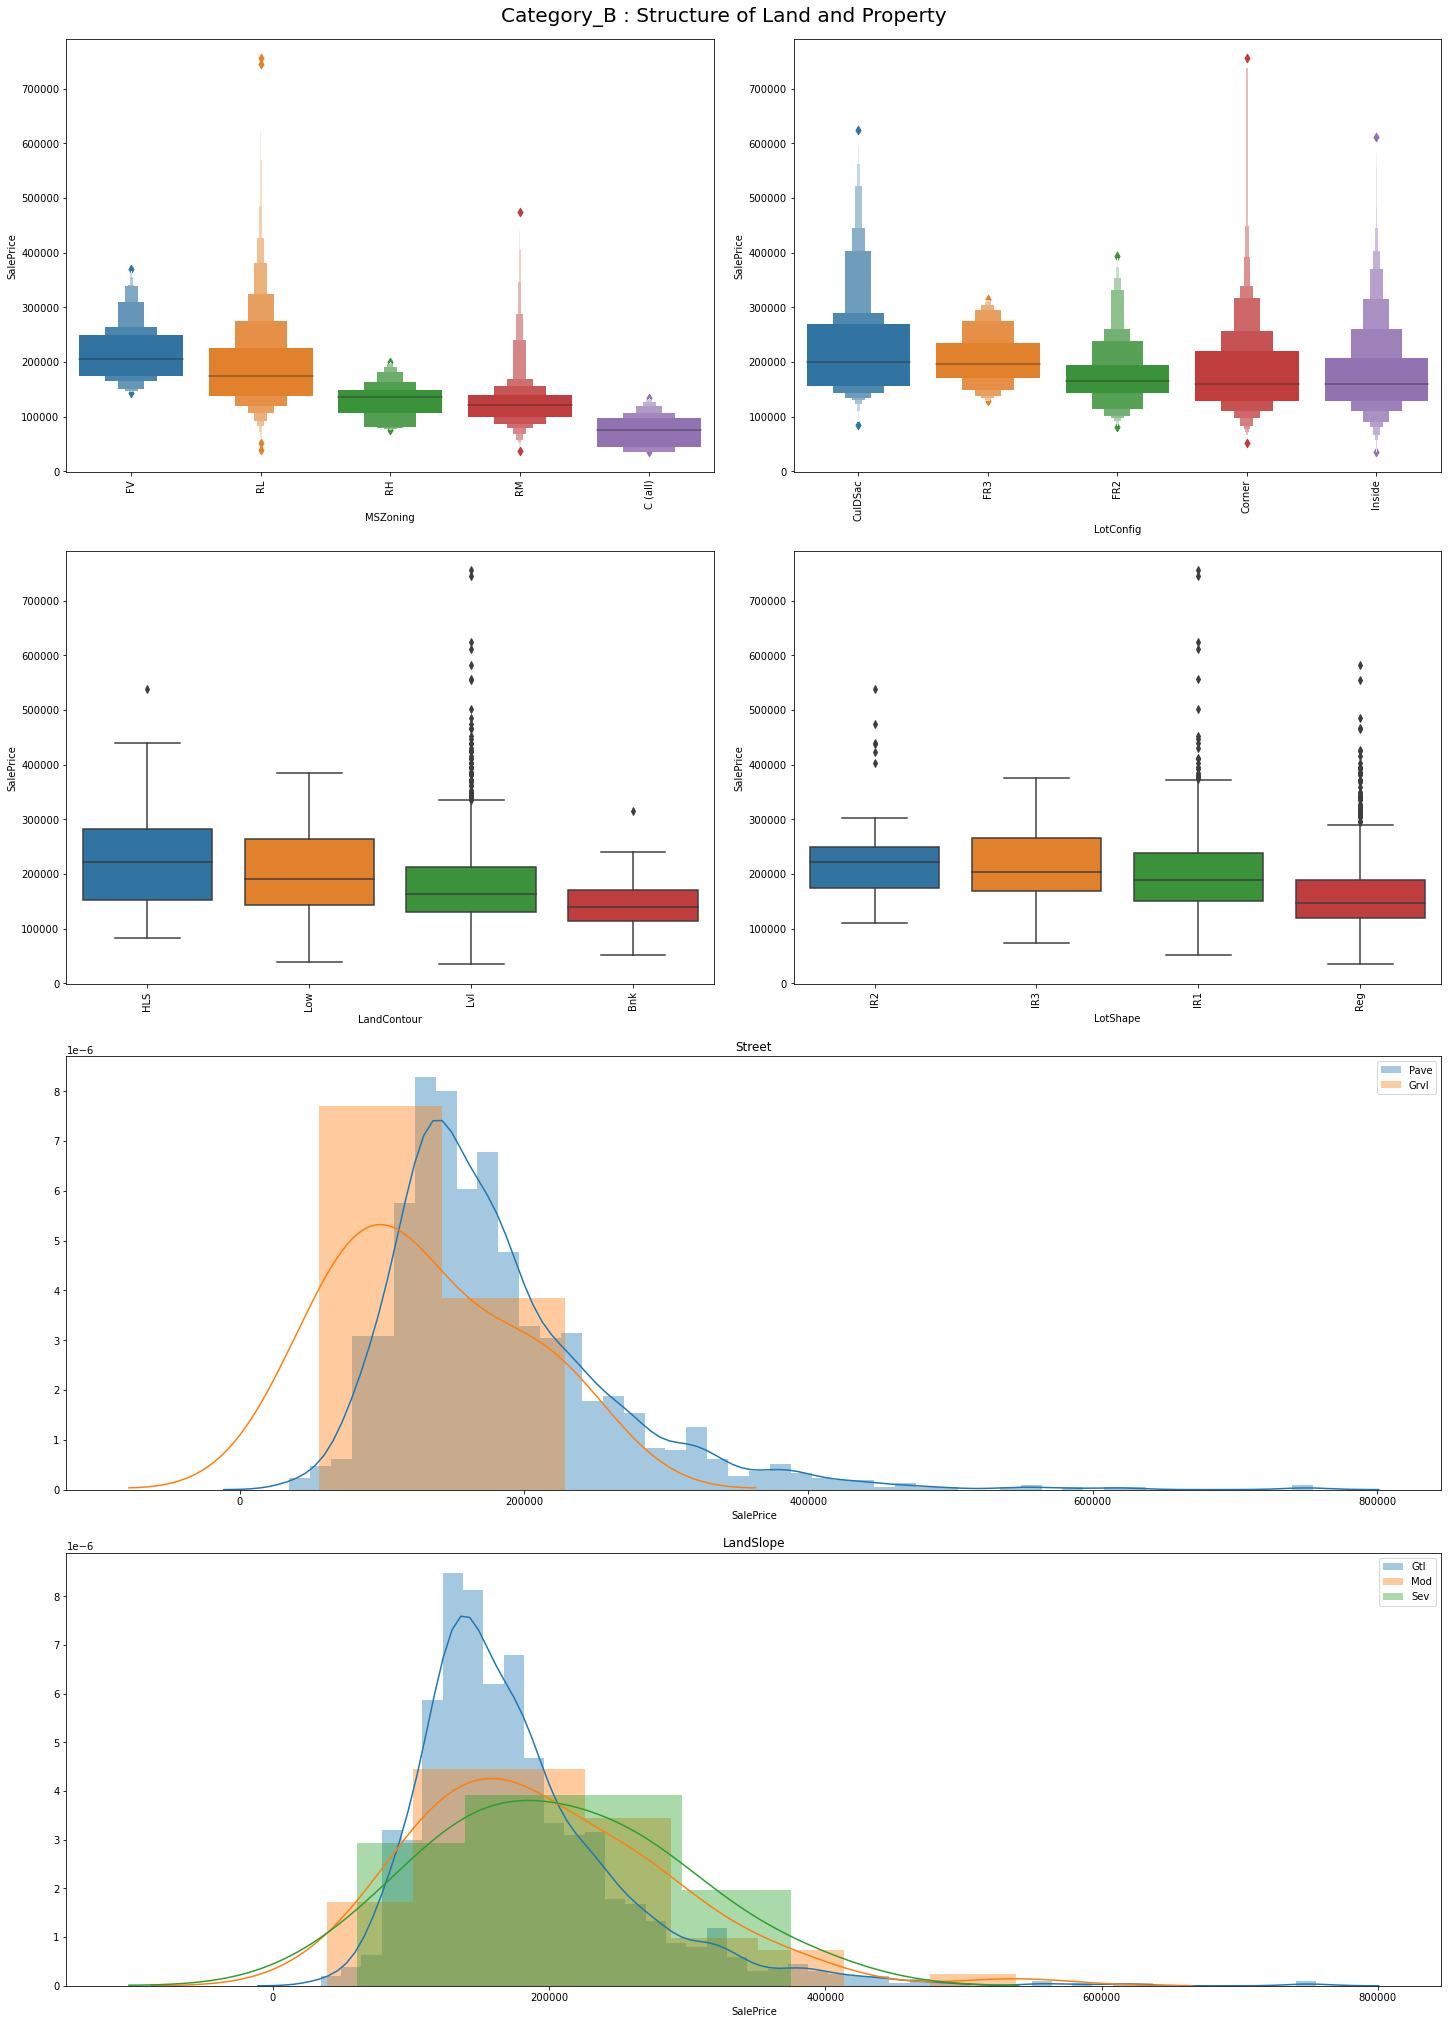

In [114]:
cat_b = ['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope']

#Will try with box plot,boxen plot and distribution plot.
fig = plt.figure(constrained_layout = True,figsize = (20,28))
gs = GridSpec(4,2,figure = fig)
for var in cat_b:
    print(var)
    print(df[var].unique())
#Box plots
i=0
for var in  ['MSZoning','LotConfig']:
    plt.subplot(gs[0,i])
    table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
    plot = sns.boxenplot(data = df, x = var,y = 'SalePrice',order = table.iloc[:,0])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
    i = i+1
i=0
for var in  ['LandContour','LotShape']:
    plt.subplot(gs[1,i])
    table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
    plot = sns.boxplot(data = df, x = var,y = 'SalePrice',order = table.iloc[:,0])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
    i = i+1
i=2
for var in ['Street','LandSlope']:
    plt.subplot(gs[i,:])
    i = i+1
    unique_vals = df[var].unique()
    targets = [df.loc[df[var] == val] for val in unique_vals]
    for target in targets:
        plot = sns.distplot(target[['SalePrice']])
    plot.legend('upper right',labels = unique_vals)
    plt.xlabel("SalePrice")
    plt.title(var)

plt.suptitle("Category_B : Structure of Land and Property",fontsize = 20)
plt.show()

From above we can see that the variability of subcategories of categorical variable for saleprice.   
MSZoning having good variability, as Floating Village residential zone have max saleprice and commercial zones have lowest sale price. This is good variable as there is significant difference among the subcategories.   
LotConfig (configuration of the lot) having not enough variation across its sub categories for salesprice.   
Landcontour its also have some varibility.   
Lotshape having subcategory as regular which is low in price as compared to others with iregular shape house.     
Street, this is not good variables for our prediction because have very less point for one subcategory.(See below)   
Landslop having gental slop with lowest price as compared to others subcategories. (see below) 


In [115]:
print("Street \n",df['Street'].value_counts())
print("LandSlop \n",df['LandSlope'].value_counts())

Street 
 Pave    1454
Grvl       6
Name: Street, dtype: int64
LandSlop 
 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


### CAT_C : Style, location and Outdoors [4,11]
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* Utilities: Type of utilities available
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* PavedDrive: Paved driveway

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Utilities
['AllPub' 'NoSeWa']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
PavedDrive
['Y' 'N' 'P']


Text(0.5, 0.98, 'CAT_C : Style, location and Outdoors')

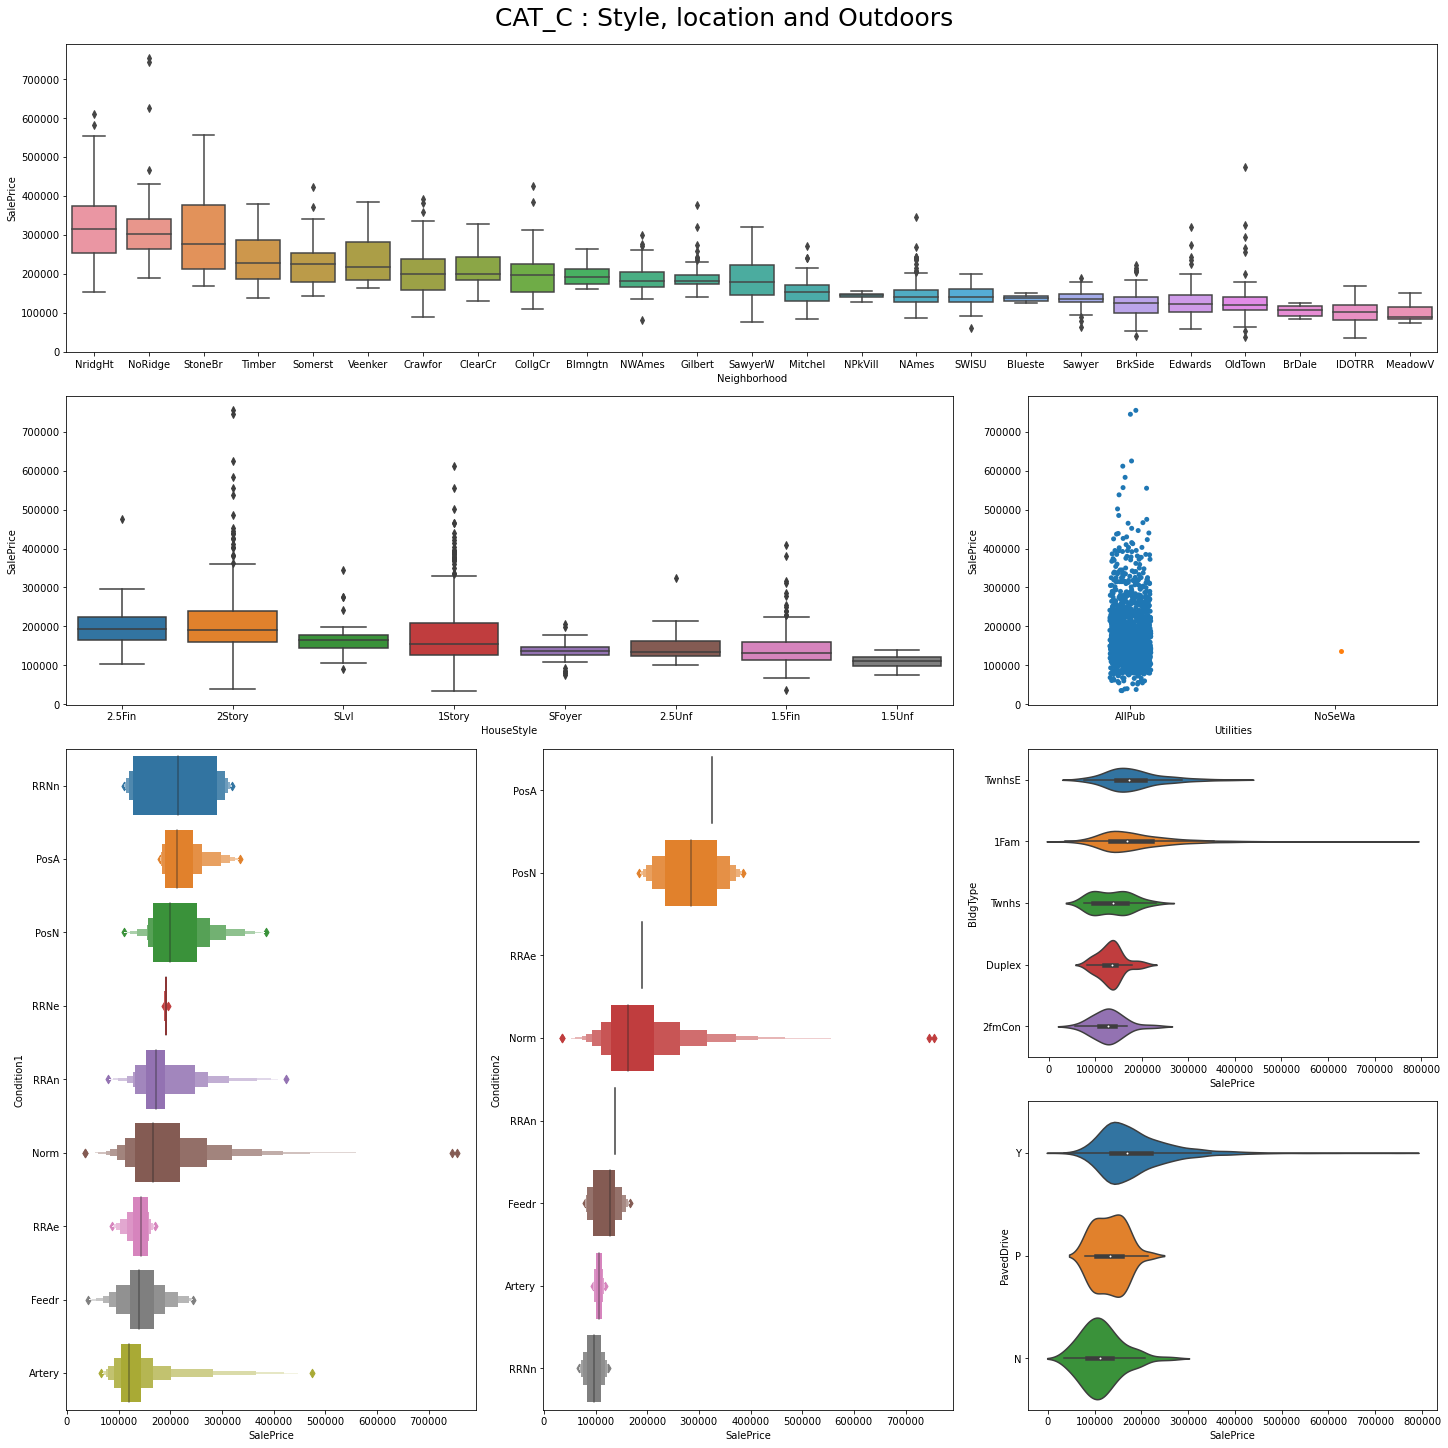

In [116]:
cat_c =  ['Neighborhood','Condition1','Condition2','Utilities','BldgType','HouseStyle','PavedDrive']
for var in cat_c:
    print(var)
    print(df[var].unique())
#will plot box plot, violin plot, boxen plot and strip plot
#Box plot
fig = plt.figure(constrained_layout= True, figsize = (20,20))
gs = GridSpec(4,3, figure = fig)
i = 0 
for var in ['Neighborhood','HouseStyle']:
    plt.subplot(gs[i,:])
    if i == 1:
        plt.subplot(gs[i,:-1])
    table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
    plot = sns.boxplot(data = df , x = var, y = 'SalePrice',orient = 'v',order = table.iloc[:,0])
    i = i+1
i = 0
for var in ['Condition1','Condition2']:
    plt.subplot(gs[2:4,i])
    table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
    plot = sns.boxenplot(data = df , y = var, x = 'SalePrice',orient = 'h',order = table.iloc[:,0])
    i = i+1
i = 1
for var in ['Utilities','BldgType','PavedDrive']:
    plt.subplot(gs[i,-1])
    if i == 1:
        table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
        plot = sns.stripplot(x = var, y = 'SalePrice',order = table.iloc[:,0],data = df )
    else:
        table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
        plot = sns.violinplot(data = df , y = var, x = 'SalePrice',orient = 'h',order = table.iloc[:,0])
    i = i+1
plt.suptitle("CAT_C : Style, location and Outdoors",fontsize = 25)

### CAT_D : Exterior Condition and quality,Internal Quality, Roofing, Foundation and housing exterior [6,9,8,5]
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* KitchenQual: Kitchen quality
* FireplaceQu: Fireplace quality
* Functional: Home functionality rating
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* Foundation: Type of foundation



ExterQual : 4
ExterCond : 5
KitchenQual : 4
FireplaceQu : 6
Functional : 7
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
Foundation : 6


Text(0.5, 0.98, 'CAT_C : Style, location and Outdoors')

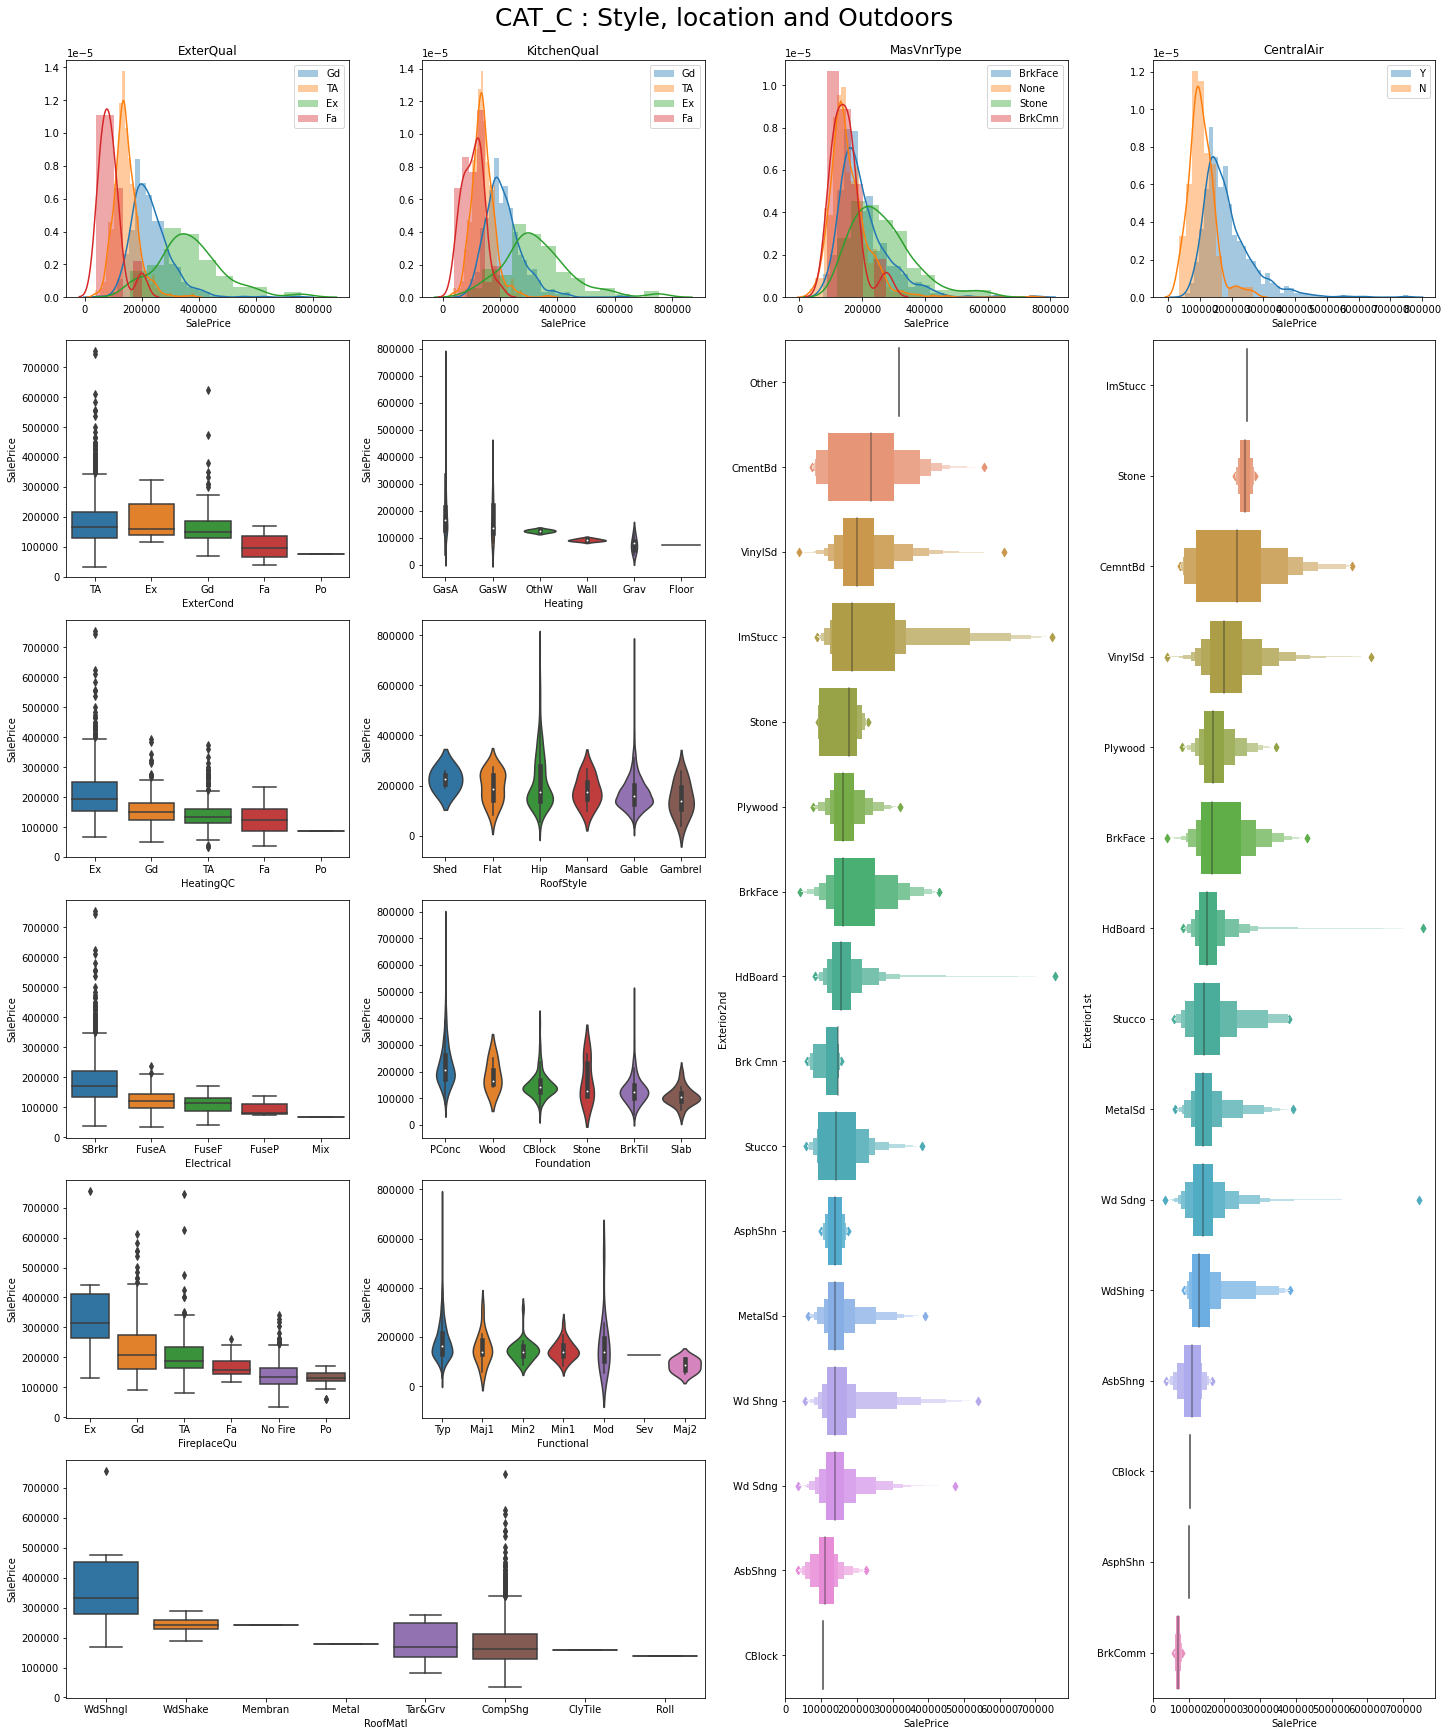

In [117]:
cat_d =  ['ExterQual','ExterCond','KitchenQual','FireplaceQu','Functional','Heating','HeatingQC','CentralAir','Electrical','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
         'MasVnrType','Foundation']
for var in cat_d:
    print(var,":",len(df[var].unique()))
    
#will plot box , violin and stripplot 
fig = plt.figure(constrained_layout = True, figsize = (20,24))
gs = GridSpec(6,4,figure = fig)

#distribution plot
i = 0
for var in ['ExterQual','KitchenQual','MasVnrType','CentralAir']:
    plt.subplot(gs[0,i])
    unique_vals = df[var].unique()
    targets = [df.loc[df[var] == val] for val in unique_vals]
    for target in targets:
        plot = sns.distplot(target[['SalePrice']])
    plot.legend('upper right',labels = unique_vals)
    plt.xlabel("SalePrice")
    plt.title(var)
    i = i+1

i = 3
for var in ['Exterior1st','Exterior2nd']:
    plt.subplot(gs[1:,i])
    i = i - 1
    table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
    plot = sns.boxenplot(y = var, x = 'SalePrice',order = table.iloc[:,0],data = df ,orient='h')

i = 1
for var in ['ExterCond','HeatingQC','Electrical','FireplaceQu','RoofMatl']:
    if i == 5:
        plt.subplot(gs[i,:-2])
        table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
        plot = sns.boxplot(x = var, y = 'SalePrice',order = table.iloc[:,0],data = df )
    else:
        plt.subplot(gs[i,0])
        table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
        plot = sns.boxplot(x = var, y = 'SalePrice',order = table.iloc[:,0],data = df )
    i = i+1
i = 1        
for var in ['Heating','RoofStyle','Foundation','Functional']:
    plt.subplot(gs[i,1])
    table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
    plot = sns.violinplot(x = var, y = 'SalePrice',order = table.iloc[:,0],data = df )
    i = i+1
    
plt.suptitle("CAT_C : Style, location and Outdoors",fontsize = 25)

### CAT_E : Basements and Garage [7,10]
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinType2: Quality of second finished area (if present)
* GarageType: Garage location
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageQual: Garage quality
* GarageCond: Garage condition

BsmtQual : 5
['Gd' 'TA' 'Ex' 'No Basement' 'Fa']
BsmtCond : 5
['TA' 'Gd' 'No Basement' 'Fa' 'Po']
BsmtExposure : 5
['No' 'Gd' 'Mn' 'Av' 'No Basement']
BsmtFinType1 : 7
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No Basement' 'LwQ']
BsmtFinType2 : 7
['Unf' 'BLQ' 'No Basement' 'ALQ' 'Rec' 'LwQ' 'GLQ']
GarageType : 7
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'No Garage' 'Basment' '2Types']
GarageFinish : 4
['RFn' 'Unf' 'Fin' 'No Garage']
GarageCars : 5
[2 3 1 0 4]
GarageQual : 6
['TA' 'Fa' 'Gd' 'No Garage' 'Ex' 'Po']
GarageCond : 6
['TA' 'Fa' 'No Garage' 'Gd' 'Po' 'Ex']


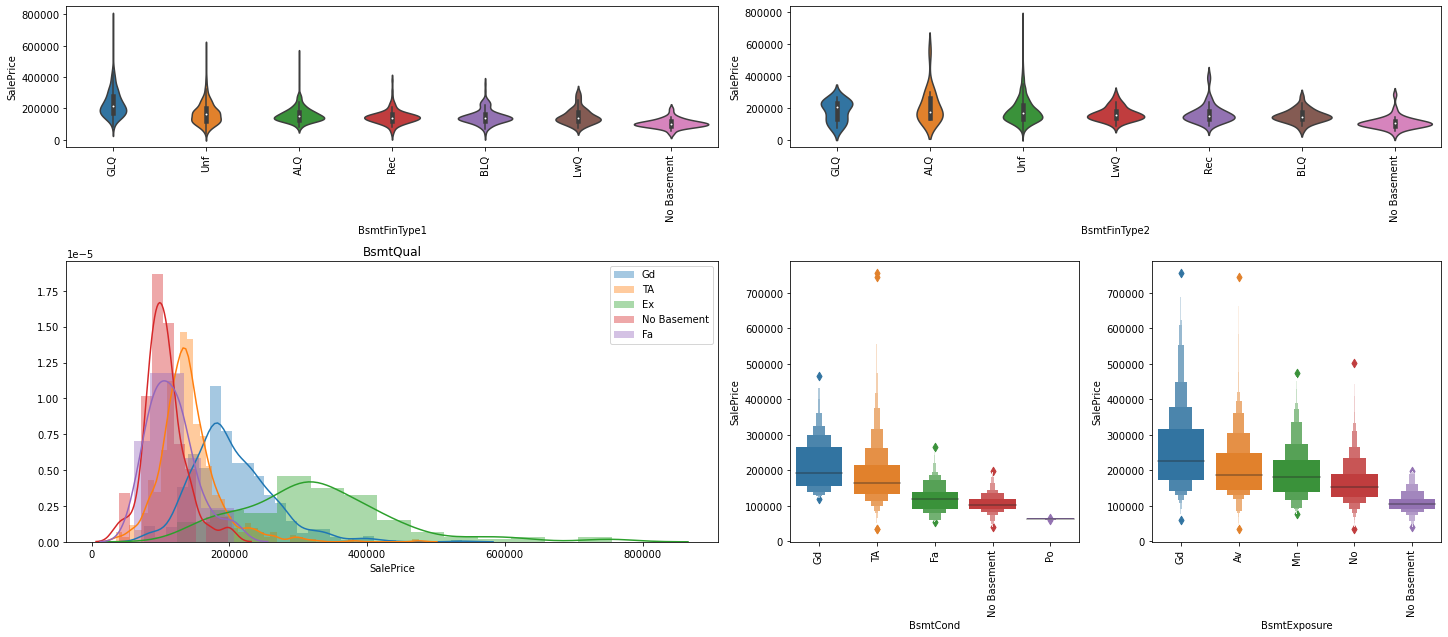

In [118]:
cat_e =  ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond']
for var in cat_e:
    print(var,":",len(df[var].unique()))
    print(df[var].unique())

fig = plt.figure(constrained_layout = True,figsize = (20,15))
gs = GridSpec(6,4, figure = fig)

plt.subplot(gs[0,:-2])
table = df.groupby(['BsmtFinType1'],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
plot = sns.violinplot(x = 'BsmtFinType1', y = 'SalePrice',order = table.iloc[:,0],data = df )
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90);

plt.subplot(gs[0,2:])
table = df.groupby(['BsmtFinType2'],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
plot = sns.violinplot(x = 'BsmtFinType2', y = 'SalePrice',order = table.iloc[:,0],data = df )
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90);

plt.subplot(gs[1:3,0:2])
var = 'BsmtQual'
unique_vals = df[var].unique()
targets = [df.loc[df[var] == val] for val in unique_vals]
for target in targets:
    plot = sns.distplot(target[['SalePrice']])
plot.legend('upper right',labels = unique_vals);
plt.xlabel("SalePrice");
plt.title(var);

plt.subplot(gs[1:3,2:3])
table = df.groupby(['BsmtCond'],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
plot = sns.boxenplot(x = 'BsmtCond', y = 'SalePrice',order = table.iloc[:,0],data = df )
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90);

plt.subplot(gs[1:3,3:])
table = df.groupby(['BsmtExposure'],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
plot = sns.boxenplot(x = 'BsmtExposure', y = 'SalePrice',order = table.iloc[:,0],data = df )
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90);

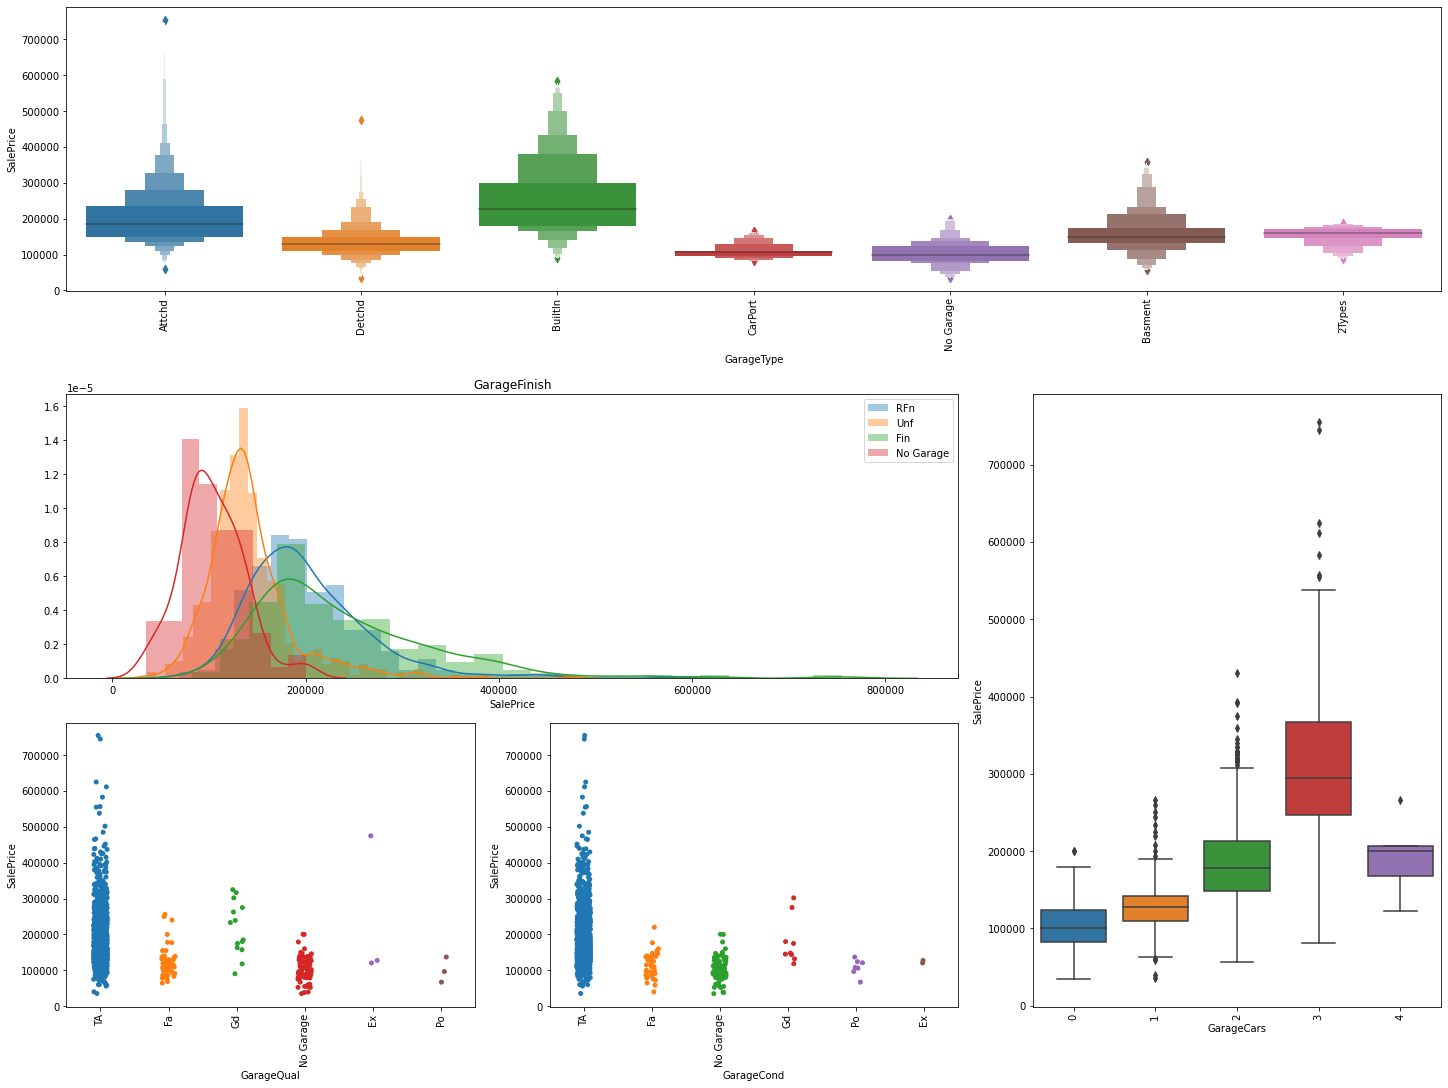

In [119]:
fig = plt.figure(constrained_layout=True,figsize=(20,15))
gs = GridSpec(3, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.boxenplot(data=df,x="GarageType",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
var = "GarageFinish"
unique_vals = df[var].unique()
targets = [df.loc[df[var] == val] for val in unique_vals]
for target in targets:
    plot = sns.distplot(target[['SalePrice']])
plot.legend('upper right',labels = unique_vals);
plt.xlabel("SalePrice");
plt.title("GarageFinish")

plt.subplot(gs[1:,-1])
a1 = sns.boxplot(data=df,x="GarageCars",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,0])
a1 = sns.stripplot(data=df,x="GarageQual",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,-2])
a1 = sns.stripplot(data=df,x="GarageCond",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

### CAT_F : Sale Type and Sale Condition, Overall Quality and Condition [12,3]
* SaleType : Type of sale
* SaleCondition: Condition of sale
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating

SaleType : 9
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
SaleCondition : 6
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
OverallQual : 10
[7 6 8 5 9 4 10 3 1 2]
OverallCond : 9
[5 8 6 7 4 2 3 9 1]


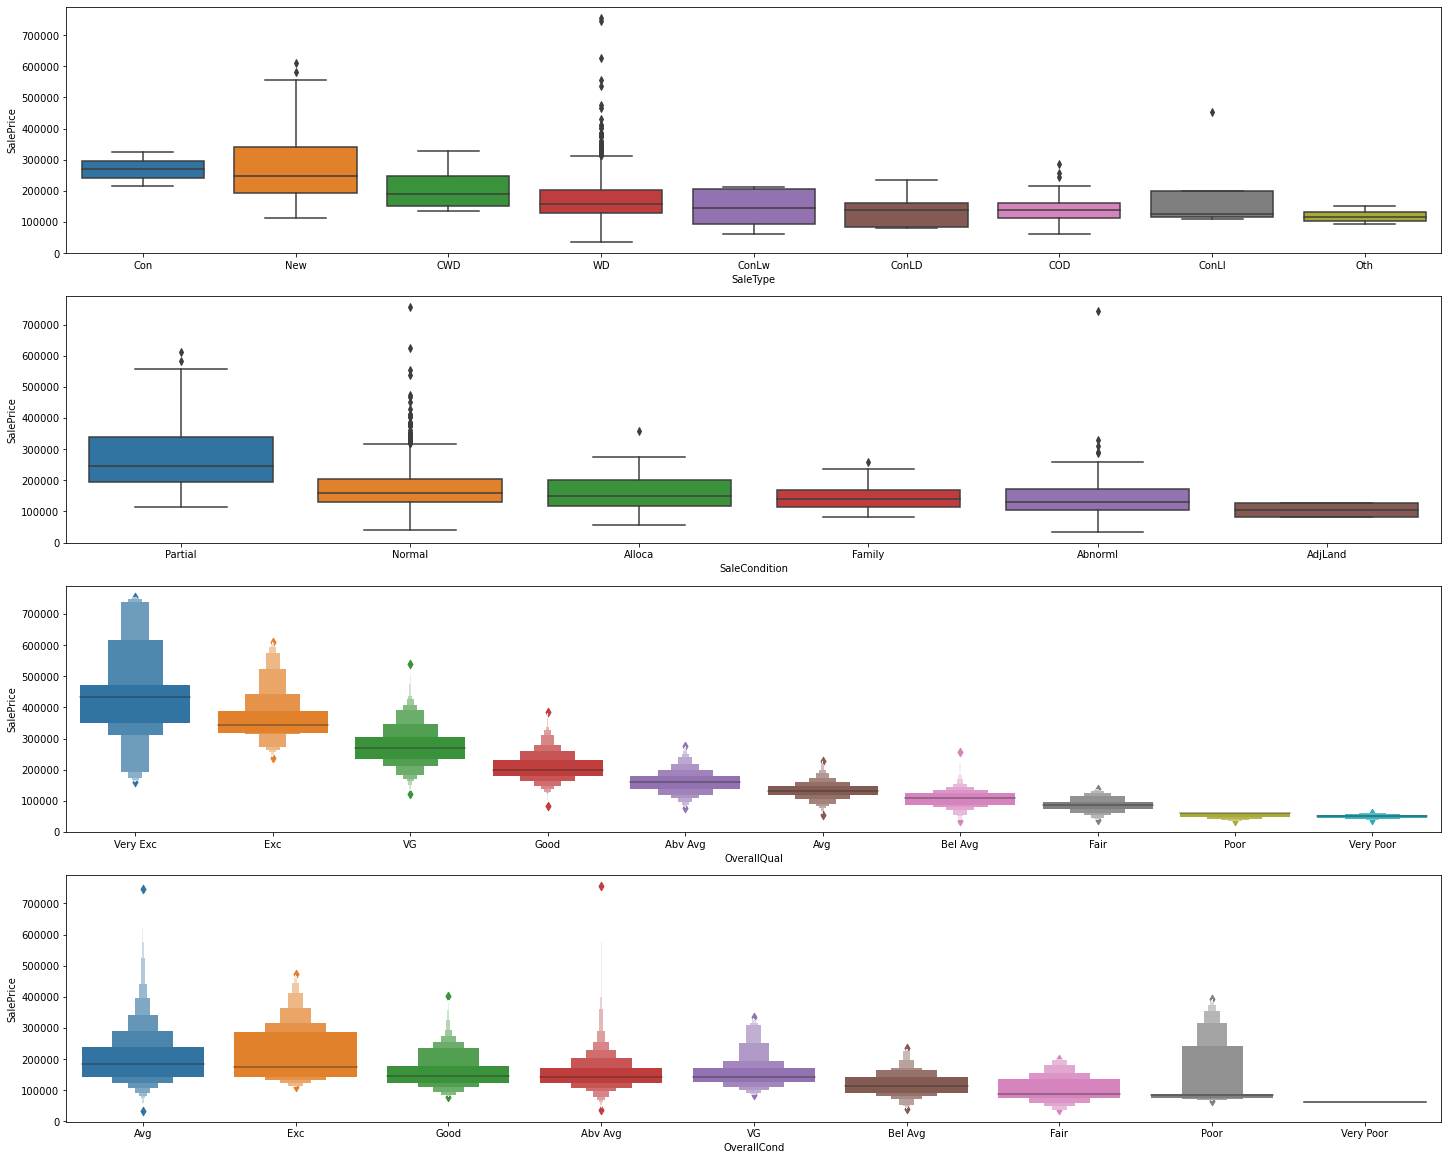

In [120]:
cat_f =  ['SaleType','SaleCondition','OverallQual','OverallCond']
for var in cat_f:
    print(var,":",len(df[var].unique()))
    print(df[var].unique())

rep_dict = {10:'Very Exc',9:'Exc',8:'VG',7:'Good',6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',2:'Poor',1:'Very Poor'}
for var in ['OverallQual','OverallCond']:
    df[var] = df[var].replace(rep_dict)
    cat_var[var] = df[var].replace(rep_dict)
    test_df[var] = test_df[var].replace(rep_dict)

fig = plt.figure(constrained_layout= True,figsize = (20,16))
gs = GridSpec(4,1,figure=fig)
i = 0
for var in cat_f:
    plt.subplot(gs[i,:])
    if i > 1:
        table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
        plot = sns.boxenplot(x = var, y = 'SalePrice',order = table.iloc[:,0],data = df )
    else:
        table = df.groupby([var],as_index=False)['SalePrice'].median().sort_values('SalePrice',ascending = False)
        plot = sns.boxplot(x = var, y = 'SalePrice',order = table.iloc[:,0],data = df )
    i = i+1

### 2. Descrete Variables and SalePrice
There are 9 variable and wil vizualise through bar plots.

[1 0 2 3]
[0 1 2]
[2 1 3 0]
[1 0 2]
[3 4 1 2 0 5 6 8]
[1 2 3 0]
[ 8  6  7  9  5 11  4 10 12  3  2 14]
[0 1 2 3]
[  0 512 648 576 555 480 519 738]


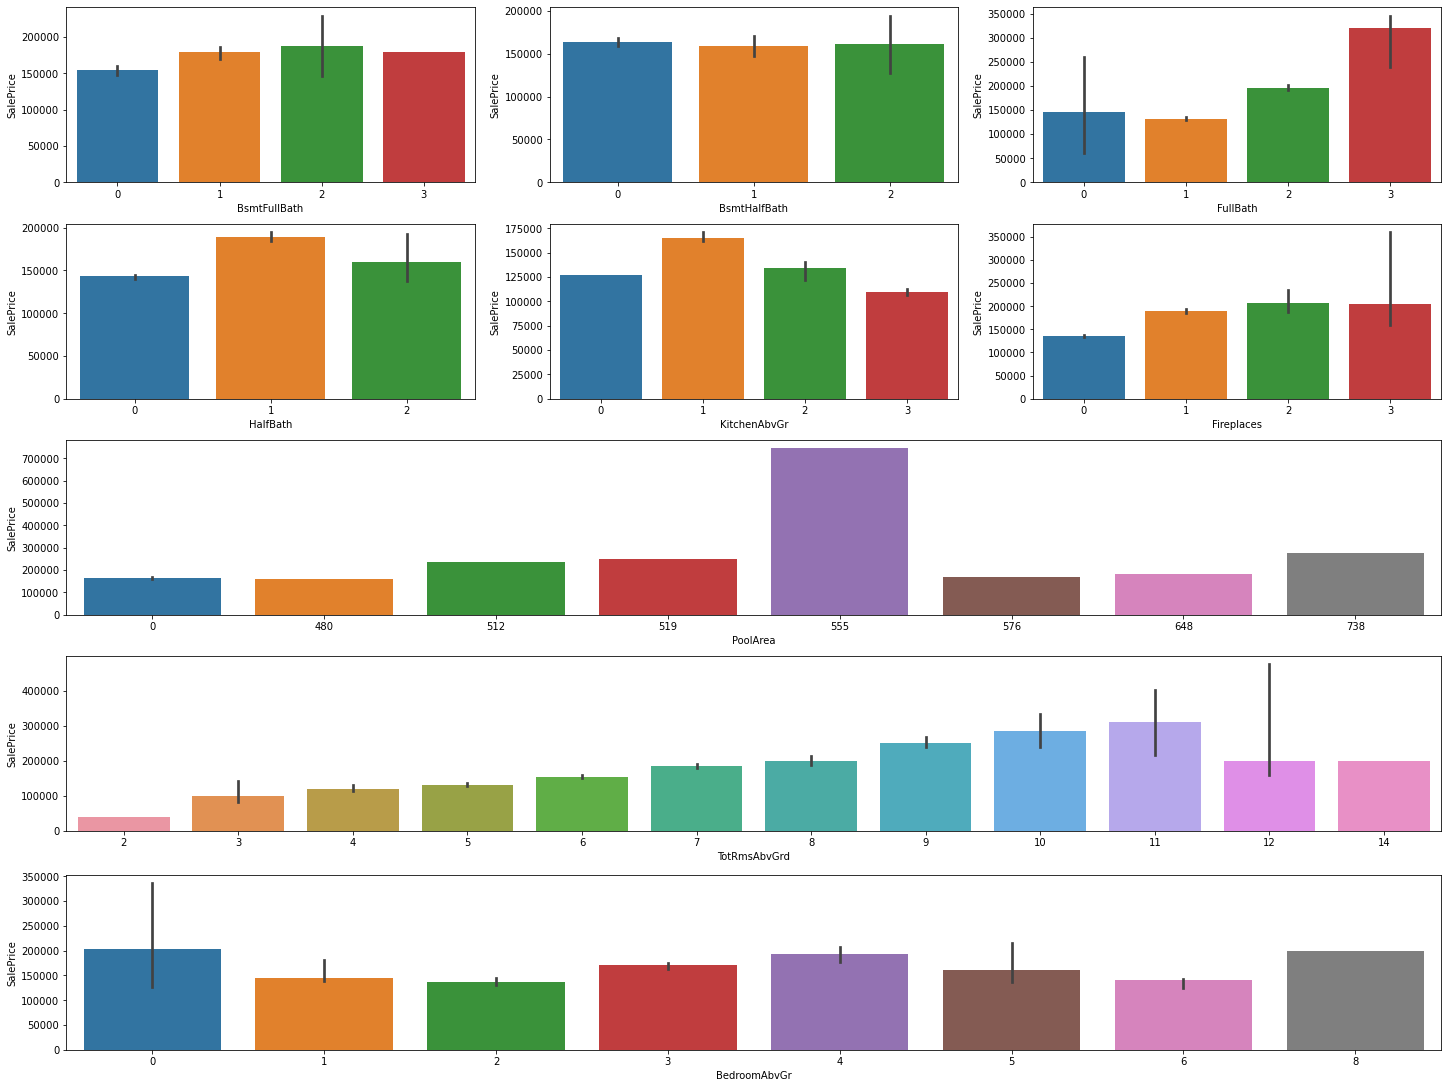

In [121]:
for var in list(desc_var.columns):
    print(df[var].unique())
desc_var.columns

from numpy import median
fig = plt.figure(constrained_layout = True,figsize = (20,15))
gs = GridSpec(5,3,figure = fig)
i = 0
for var in ['BsmtFullBath', 'BsmtHalfBath', 'FullBath']:
    plt.subplot(gs[0,i])
    plot = sns.barplot(data = df, x =var,y = 'SalePrice',estimator = median)
    i = i+1
i = 0
for var in ['HalfBath','KitchenAbvGr', 'Fireplaces']:
    plt.subplot(gs[1,i])
    plot = sns.barplot(data = df, x =var,y = 'SalePrice',estimator = median)
    i = i+1
i = 2
for var in ['PoolArea','TotRmsAbvGrd','BedroomAbvGr']:
    plt.subplot(gs[i,:])
    plot = sns.barplot(data = df, x =var,y = 'SalePrice',estimator = median)
    i = i+1

### 3. Date Variables and SalePrice

There are four date variables will plot trends and barplot.

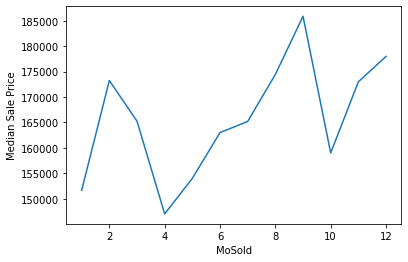

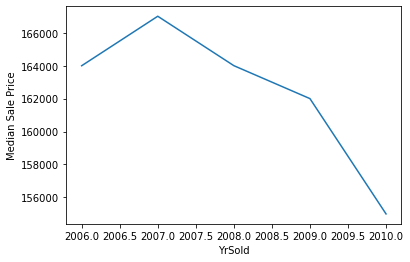

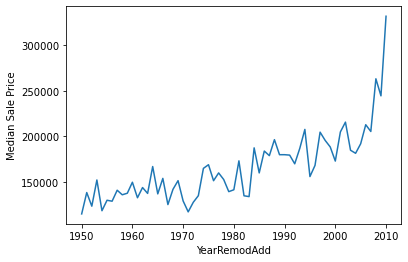

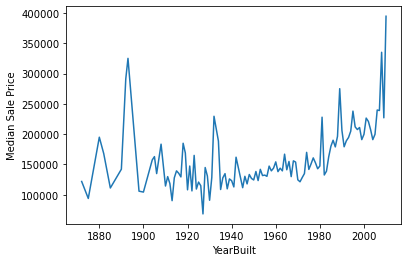

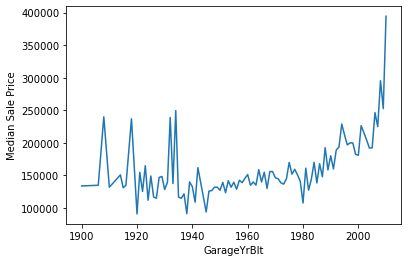

In [122]:
for var in date_var.columns:
    plot_tab = df.groupby([var])['SalePrice'].median().plot()
    plt.ylabel("Median Sale Price")
    plt.show()

### 4. Continuous Variables and SalePrice

There are 20 date variables will plot scatter and correlation.

In [123]:
df[list(con_var.columns) + ['SalePrice']].corr()

,GarageArea,BsmtFinSF2,LowQualFinSF,SalePrice,BsmtFinSF1,TotalBsmtSF,1stFlrSF,WoodDeckSF,3SsnPorch,LotArea,ScreenPorch,GrLivArea,MasVnrArea,BsmtUnfSF,MiscVal,2ndFlrSF,OpenPorchSF,LotFrontage,EnclosedPorch,SalePrice
GarageArea,1.000000,-0.018227,-0.067601,0.623431,0.296970,0.486665,0.489782,0.224666,0.035087,0.180403,0.051412,0.468997,0.370884,0.183303,-0.027400,0.138347,0.241435,0.323511,-0.121777,0.623431
BsmtFinSF2,-0.018227,1.000000,0.014807,-0.011378,-0.050117,0.104810,0.097117,0.067898,-0.029993,0.111170,0.088871,-0.009640,-0.071330,-0.209294,0.004940,-0.099260,0.003093,0.042463,0.036543,-0.011378
LowQualFinSF,-0.067601,0.014807,1.000000,-0.025606,-0.064503,-0.033245,-0.014241,-0.025444,-0.004296,0.004779,0.026799,0.134683,-0.068628,0.028167,-0.003793,0.063353,0.018251,0.037469,0.061081,-0.025606
SalePrice,0.623431,-0.011378,-0.025606,1.000000,0.386420,0.613581,0.605852,0.324413,0.044584,0.263843,0.111447,0.708624,0.472614,0.214479,-0.021190,0.319334,0.315856,0.334771,-0.128578,1.000000
BsmtFinSF1,0.296970,-0.050117,-0.064503,0.386420,1.000000,0.522396,0.445863,0.204306,0.026451,0.214103,0.062021,0.208171,0.261256,-0.495251,0.003571,-0.137079,0.111761,0.214367,-0.102303,0.386420
TotalBsmtSF,0.486665,0.104810,-0.033245,0.613581,0.522396,1.000000,0.819530,0.232019,0.037384,0.260833,0.084489,0.454868,0.360067,0.415360,-0.018479,-0.174512,0.247264,0.363472,-0.095478,0.613581
1stFlrSF,0.489782,0.097117,-0.014241,0.605852,0.445863,0.819530,1.000000,0.235459,0.056104,0.299475,0.088758,0.566024,0.339850,0.317987,-0.021096,-0.202646,0.211671,0.413773,-0.065292,0.605852
WoodDeckSF,0.224666,0.067898,-0.025444,0.324413,0.204306,0.232019,0.235459,1.000000,-0.032771,0.171698,-0.074181,0.247433,0.159991,-0.005316,-0.009551,0.092165,0.058661,0.075542,-0.125989,0.324413
3SsnPorch,0.035087,-0.029993,-0.004296,0.044584,0.026451,0.037384,0.056104,-0.032771,1.000000,0.020423,-0.031436,0.020643,0.019144,0.020764,0.000354,-0.024358,-0.005842,0.061945,-0.037305,0.044584
LotArea,0.180403,0.111170,0.004779,0.263843,0.214103,0.260833,0.299475,0.171698,0.020423,1.000000,0.043160,0.263116,0.103321,-0.002618,0.038068,0.050986,0.084774,0.304522,-0.018340,0.263843


# Predictive Modeling :

In [124]:
#creating a duplicate data set for this section.
import copy
data = df.copy()
date_var.columns.tolist()

['MoSold', 'YrSold', 'YearRemodAdd', 'YearBuilt', 'GarageYrBlt']

## Step_1 : Log Transformation of Skewed values.

In [125]:
#getting skewed features
skewed_var = []
for var in con_var.columns:
    if data[var].skew() > 0 or data[var].skew() < 0:
        skewed_var.append(var)

#final list of variables for log transformation
skewed_var_1 = []
for var in skewed_var:
    if 0 not in data[var].unique() and var not in date_var.columns.tolist():
        skewed_var_1.append(var)
        print(var)

#Applying the log transformation.
values_check = {"Variables" : [],"Before_Skewness" : [],"After_Skewness" : []}
for var in skewed_var_1:
    values_check["Variables"].append(var)
    values_check["Before_Skewness"].append(data[var].skew())
    data[var] = np.log(data[var])
    values_check["After_Skewness"].append(data[var].skew())
pd.DataFrame(values_check)

SalePrice
1stFlrSF
LotArea
GrLivArea
LotFrontage


,Variables,Before_Skewness,After_Skewness
0,SalePrice,1.882876,0.121335
1,1stFlrSF,1.376757,0.079157
2,LotArea,12.207688,-0.137994
3,GrLivArea,1.366560,-0.006995
4,LotFrontage,2.409147,-0.909115


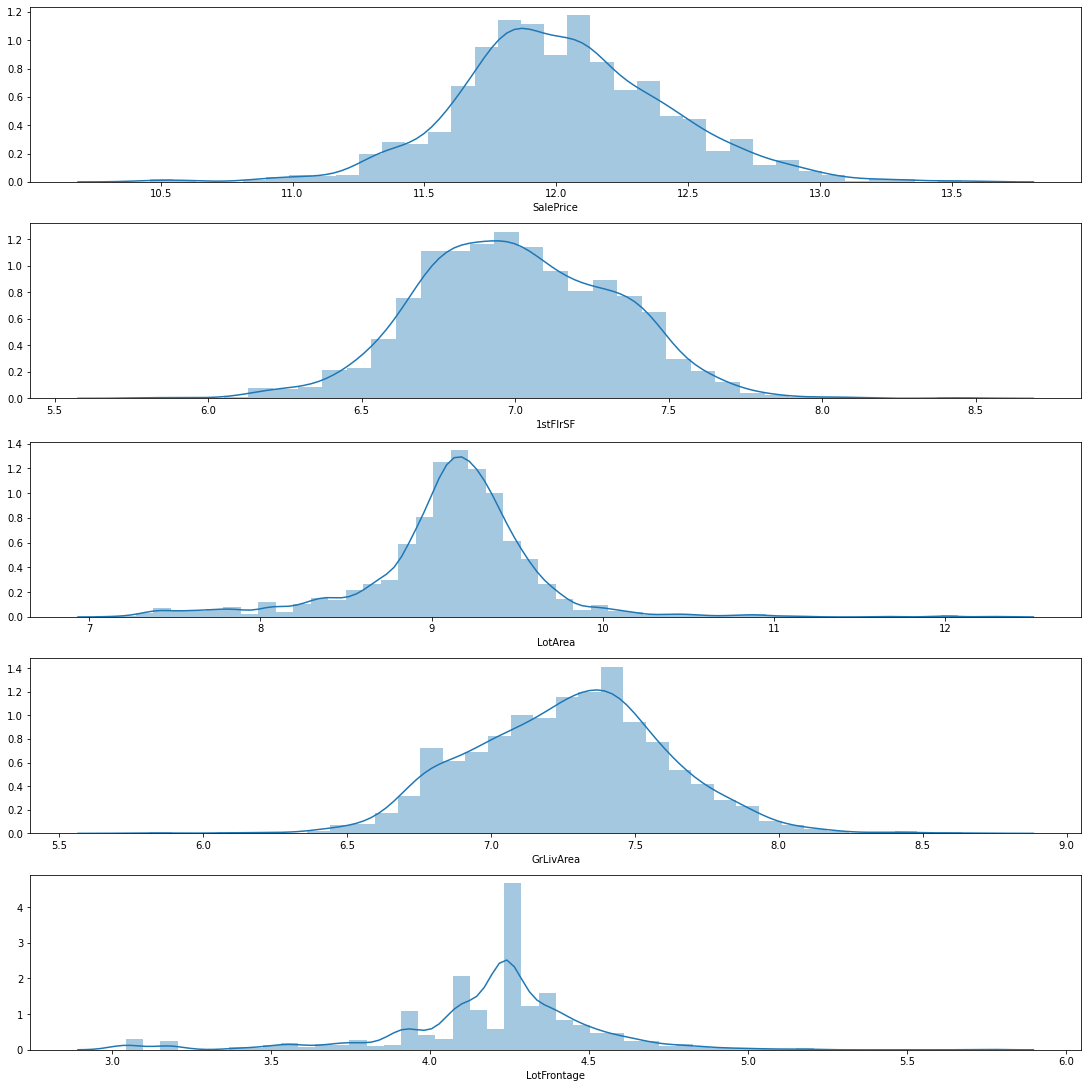

In [126]:
#Check the districution of above 5 variables
fig = plt.figure(constrained_layout = True,figsize = (15,15))
from matplotlib.gridspec import GridSpec
gs =  GridSpec(5,1,figure = fig)
i = 0
for var in skewed_var_1:
    plt.subplot(gs[i,0])
    sns.distplot(data[var])
    i = i+1

## Step_2 : Label encoding for Categorical Variables

In [127]:
from sklearn.preprocessing import LabelEncoder
labelenco = LabelEncoder()

for var in cat_var.columns:
    data[var] = labelenco.fit_transform(data[var])                  #for train
    test_df[var] = labelenco.fit_transform(test_df[var])            #for test

## Step_3 : Features Scaling
There are two types of features scaling methods  
* Standard Scaler : use normal distribution properties.
* MinMaxScaler : shrink the range for a variables in 0 to 1.

In [128]:
#Now dependent and independent variables
y = data['SalePrice']
X = data.drop(['SalePrice'],axis = 1)

col_x = X.columns

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = pd.DataFrame(scale.fit_transform(X),columns = [col_x])            # for train data set

col_test = test_df.columns                                            # for test data set
test_df = pd.DataFrame(scale.fit_transform(test_df),columns = [col_test])

## Step_4 : Spliting the data into Train and test

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

## Step_5 : Features Selection 
Will use *SelectFromModel* with *lasso* from selecting best features.

In [130]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feat_sel = SelectFromModel(Lasso(alpha = 0.005,random_state = 100))
feat_sel.fit(X_train,y_train)

#Getting selected features
sel_feat = X_train.columns[(feat_sel.get_support())]
print(sel_feat)

MultiIndex([(     'LotShape',),
            (     'BldgType',),
            (  'OverallQual',),
            (    'YearBuilt',),
            ( 'YearRemodAdd',),
            (    'ExterQual',),
            (     'BsmtQual',),
            ( 'BsmtExposure',),
            ( 'BsmtFinType1',),
            (    'HeatingQC',),
            (   'CentralAir',),
            (   'Electrical',),
            (     '1stFlrSF',),
            (    'GrLivArea',),
            (  'KitchenQual',),
            (   'Functional',),
            (   'Fireplaces',),
            (   'GarageType',),
            ( 'GarageFinish',),
            (   'GarageCars',),
            (   'PavedDrive',),
            ('SaleCondition',)],
           )


In [131]:
#Dropping all others remainnig features
X_train = X_train[sel_feat].reset_index(drop = True)

In [132]:
X_train.head()

,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,...,1stFlrSF,GrLivArea,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,1.0,0.00,0.111111,0.384058,0.000000,1.000000,1.0,0.75,0.833333,1.0,...,0.359675,0.336216,1.000000,1.0,0.000000,1.000000,0.333333,0.00,1.0,0.8
1,1.0,0.00,0.555556,0.876812,0.716667,0.666667,0.5,0.25,0.333333,0.0,...,0.534682,0.732144,0.666667,1.0,0.333333,0.166667,0.666667,0.75,1.0,0.8
2,1.0,0.00,0.000000,0.528986,0.000000,1.000000,1.0,0.75,0.500000,1.0,...,0.329603,0.528282,1.000000,1.0,0.333333,0.833333,1.000000,0.25,1.0,0.8
3,1.0,0.00,0.000000,0.275362,0.883333,1.000000,1.0,0.75,1.000000,0.5,...,0.415374,0.561846,0.666667,1.0,0.000000,0.166667,1.000000,0.25,1.0,0.8
4,1.0,0.25,0.222222,0.094203,0.000000,1.000000,1.0,0.75,1.000000,0.5,...,0.498227,0.681028,1.000000,1.0,0.000000,0.833333,1.000000,0.50,0.0,0.8


In [133]:
#Similarly for testing dataset
X_test = X_test[sel_feat]
X_test.head()

,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,...,1stFlrSF,GrLivArea,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
1436,1.0,0.0,0.222222,0.717391,0.350000,1.000000,1.0,0.75,0.0,1.0,...,0.359675,0.336216,1.000000,1.0,0.000000,0.833333,1.000000,0.50,1.0,0.8
57,0.0,0.0,0.555556,0.956522,0.900000,0.666667,0.5,0.75,1.0,0.0,...,0.357919,0.579775,0.666667,1.0,0.000000,0.166667,0.666667,0.50,1.0,0.8
780,1.0,0.0,0.555556,0.891304,0.766667,1.000000,0.5,0.75,1.0,0.5,...,0.500348,0.467713,1.000000,1.0,0.333333,0.166667,0.000000,0.50,1.0,0.8
382,0.0,0.0,0.555556,0.971014,0.933333,0.666667,0.5,0.00,1.0,0.0,...,0.391177,0.595267,0.666667,1.0,0.000000,0.166667,0.666667,0.50,1.0,0.8
1170,1.0,0.0,0.000000,0.760870,0.450000,1.000000,1.0,0.00,0.0,1.0,...,0.457206,0.427385,1.000000,1.0,0.333333,0.166667,0.000000,0.25,1.0,0.8


In [134]:
#for Final test data set for submission
test_df = test_df[sel_feat]
test_df.head()

,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,...,1stFlrSF,GrLivArea,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,1.0,0.0,0.111111,0.625954,0.183333,1.000000,1.0,0.75,0.833333,1.0,...,0.104309,0.104309,1.000000,1.0,0.00,0.166667,1.000000,0.2,1.0,0.8
1,0.0,0.0,0.000000,0.603053,0.133333,1.000000,1.0,0.75,0.000000,1.0,...,0.196672,0.196672,0.666667,1.0,0.00,0.166667,1.000000,0.2,1.0,0.8
2,0.0,0.0,0.111111,0.900763,0.800000,1.000000,0.5,0.75,0.333333,0.5,...,0.111135,0.260666,1.000000,1.0,0.25,0.166667,0.000000,0.4,1.0,0.8
3,0.0,0.0,0.000000,0.908397,0.800000,1.000000,1.0,0.75,0.333333,0.0,...,0.110708,0.255333,0.666667,1.0,0.25,0.166667,0.000000,0.4,1.0,0.8
4,0.0,1.0,0.777778,0.862595,0.700000,0.666667,0.5,0.75,0.000000,0.0,...,0.186220,0.186220,0.666667,1.0,0.00,0.166667,0.666667,0.4,1.0,0.8


## Step_6 : Model Building 
(a). Linear Regression
(b). Gradient Boosting
(c). XGBoost Regressor

### [a] Linear Regression

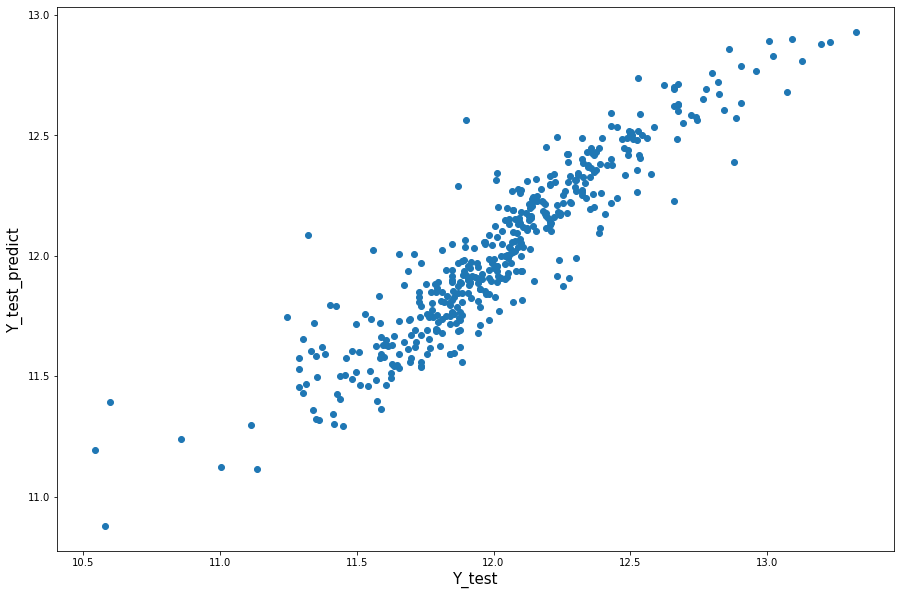

Mean Absolute Error :  0.11259848637281544
Mean Squared Error :  0.025166330451854377
Root Mean Absolute Error :  0.15863899410880786

Accuracy of Linear Regression Model :  85.0 %


In [135]:
#Importing the files
from sklearn.linear_model import LinearRegression         #for modeling
from sklearn import metrics                               #for metrices

lm = LinearRegression()

#Fitting the model
lm.fit(X_train,y_train)

#Prediction for test data set
lm_predict = lm.predict(X_test)

#Scatter Plot : Between Y_test and Y_test_prediction
fig = plt.figure(figsize = (15,10))
plt.scatter(y_test,lm_predict)
plt.xlabel("Y_test",fontsize = 15); plt.ylabel("Y_test_predict",fontsize = 15)
plt.show()

#Model Evaluation : will check with RMSE, MSE, MAE and Accuracy
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,lm_predict))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,lm_predict))
print("Root Mean Absolute Error : ",np.sqrt(metrics.mean_squared_error(y_test,lm_predict)))

#Model Accuracy : with lm.score()
print("\nAccuracy of Linear Regression Model : ",round(lm.score(X_test,y_test)*100),'%')


### [b] Gradient Boosting Regressor

In [136]:
from sklearn.ensemble import GradientBoostingRegressor             #GBM Algorithm
from sklearn.model_selection import cross_val_score,GridSearchCV   

#For Metrices 
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

#Definning User Define fuction for the Model simulation
def model_fit(algorithm,train_set,train_y,test_set,test_y,
             perform_CV = True,print_FeaturesImportance = True,cv_folds = 5):     #setting some of by default values
    #Fitting the Model
    algorithm.fit(train_set,train_y)     
    
    #Prediction
    train_pred = algorithm.predict(train_set)
    test_pred = algorithm.predict(test_set)
    
    #Model Evaluation Reports
    print("Model Evaluation Reports/Metrices : ")
    model_eval = pd.DataFrame({"Evaluation Metrices" : [],"Train" :[],"Test":[]})
    model_eval["Evaluation Metrices"] = ["MAE","MSE","RMSE","Accuracy"]
    model_eval["Train"] = [MAE(train_y,train_pred),MSE(train_y,train_pred),np.sqrt(MSE(train_y,train_pred)),algorithm.score(train_set,train_y)]
    model_eval["Test"] = [MAE(test_y,test_pred),MSE(test_y,test_pred),np.sqrt(MSE(test_y,test_pred)),algorithm.score(test_set,test_y)]
    print(model_eval)
    
    #Cross Validation
    if perform_CV :
        cv_score = cross_val_score(algorithm,train_set,train_y,cv = cv_folds)
        print("\nCV Scores :",cv_score)
        print("Min: ",np.min(cv_score));print("Max: ",np.max(cv_score));print("Mean: ",np.mean(cv_score));print("Std: ",np.std(cv_score))
    
    #Printing features Importance
    if print_FeaturesImportance :
        feat_imp = algorithm.feature_importances_
        feat_col = list(train_set.columns)
        feat_df = pd.DataFrame({"Features" : feat_col,"Importance" : feat_imp})
        feat_df = feat_df.sort_values("Importance",ascending = False)
        
        #Plot them
        fig = plt.figure(figsize = (15,15))
        fig = sns.barplot(data = feat_df,x = 'Features',y = 'Importance')
        plt.xlabel("Features",fontsize = 15);plt.ylabel("Importance",fontsize=15);plt.title("Features Importance",fontsize = 20)
        plt.xticks(rotation = 90)
        plt.show()
    

Model Evaluation Reports/Metrices : 
  Evaluation Metrices     Train      Test
0                 MAE  0.069294  0.102613
1                 MSE  0.008360  0.022229
2                RMSE  0.091434  0.149096
3            Accuracy  0.946841  0.864899

CV Scores : [0.88058913 0.88020907 0.8354085  0.87691637 0.90184101]
Min:  0.835408499151457
Max:  0.901841008581085
Mean:  0.874992813913725
Std:  0.021679352496491503


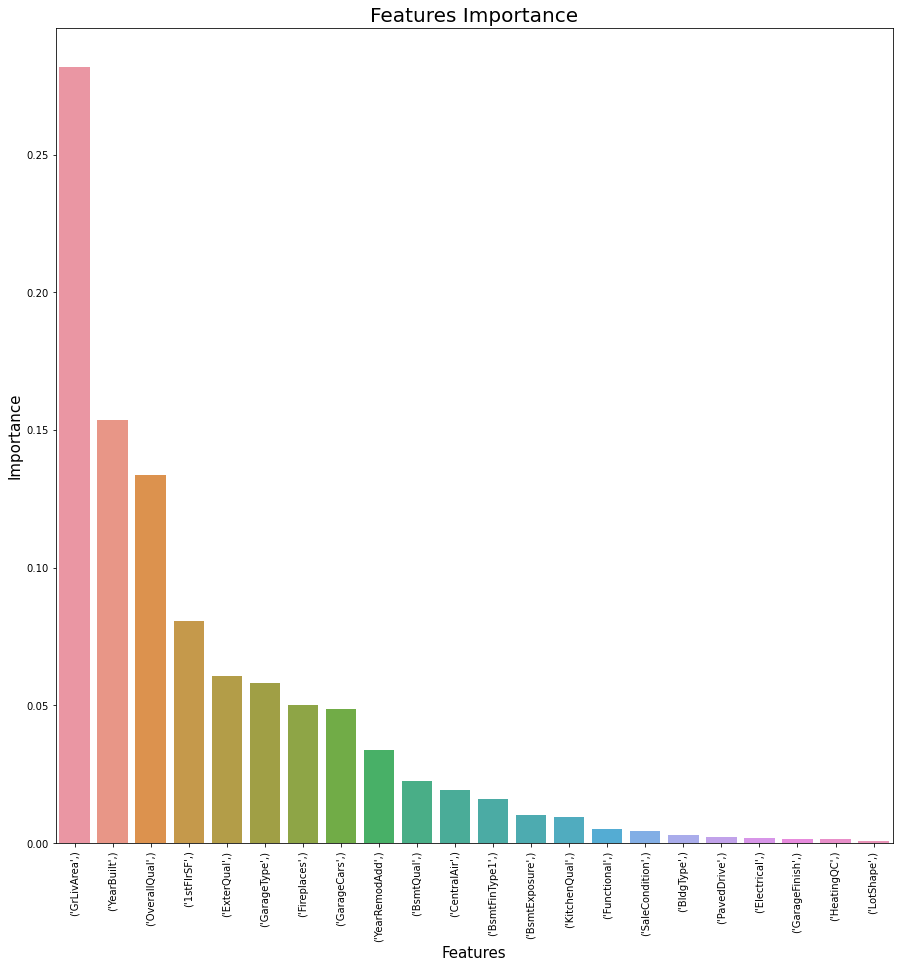

In [137]:
#First Model : Baseline Model
gbm_1 = GradientBoostingRegressor(random_state=5)
model_fit(gbm_1,X_train,y_train,X_test,y_test)

#### Hyperparameter tunning

In [138]:
#Tuning the number of estimators
param1 = {'n_estimators': range(1000,4000,1000)}

#Putting the parameters
G_search1 = GridSearchCV(estimator= GradientBoostingRegressor(learning_rate = 0.05,min_samples_split = 10,min_samples_leaf = 15,
                                                             max_depth = 4,max_features = 'sqrt', random_state = 5),
                        param_grid = param1,iid = False,cv = 5)

#Fitting the Model
G_search1.fit(X_train,y_train)

#Printing results
G_search1.cv_results_

{'mean_fit_time': array([0.69705353, 1.40361481, 2.07427316]),
 'std_fit_time': array([0.00516843, 0.01962237, 0.01014239]),
 'mean_score_time': array([0.00813704, 0.01411328, 0.02026887]),
 'std_score_time': array([0.00010717, 0.00030593, 0.00050707]),
 'param_n_estimators': masked_array(data=[1000, 2000, 3000],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1000},
  {'n_estimators': 2000},
  {'n_estimators': 3000}],
 'split0_test_score': array([0.84663544, 0.83610362, 0.83252859]),
 'split1_test_score': array([0.85087139, 0.84842537, 0.8460588 ]),
 'split2_test_score': array([0.83380519, 0.82525716, 0.81960772]),
 'split3_test_score': array([0.88107325, 0.87860044, 0.87678652]),
 'split4_test_score': array([0.8915439 , 0.88478081, 0.88072114]),
 'mean_test_score': array([0.86078584, 0.85463348, 0.85114055]),
 'std_test_score': array([0.02183631, 0.02335869, 0.02408018]),
 'rank_test_score': array([1, 2, 3], d

In [139]:
#Printing Best Parameters
print(G_search1.best_params_)

#Printing Best Score
print(G_search1.best_score_)

{'n_estimators': 1000}
0.8607858369561612


Model Evaluation Reports/Metrices : 
  Evaluation Metrices     Train      Test
0                 MAE  0.017163  0.103594
1                 MSE  0.003358  0.022158
2                RMSE  0.057950  0.148855
3            Accuracy  0.978646  0.865334

CV Scores : [0.88258099 0.84783903 0.83496501 0.87385946 0.89645638]
Min:  0.8349650113894178
Max:  0.8964563759671311
Mean:  0.8671401718973841
Std:  0.02258664416740639


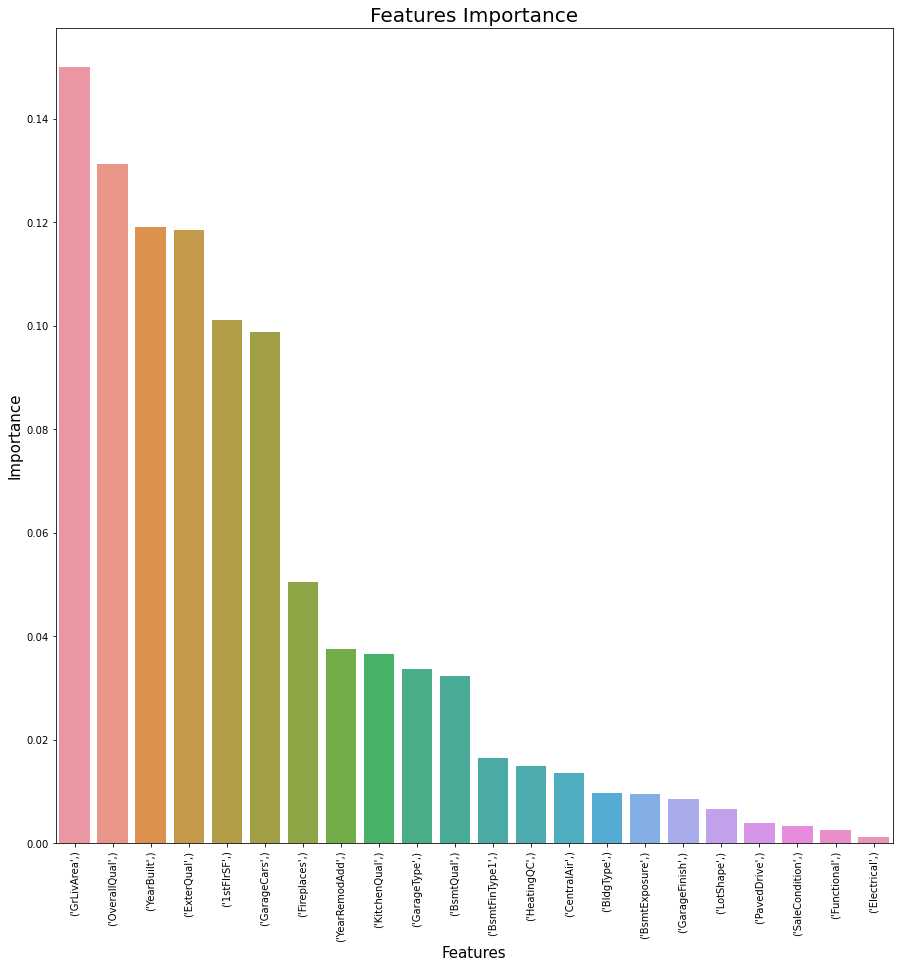

In [140]:
#We can tune others parameter to get good accuracy
gbm_2 = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.05,max_depth=9,min_samples_split=17,max_features='sqrt',
                                 min_samples_leaf=13,loss='huber',random_state=5)

#Check this model
model_fit(gbm_2,X_train,y_train,X_test,y_test)

In [141]:
#Submission with Gradient Boosting Regressor
gbm_prediction = gbm_2.predict(test_df)
gbm_prediction

array([11.48016761, 11.5902514 , 11.8294211 , ..., 11.66490043,
       11.54545459, 11.85270485])

### [c] XGBoost Regressor

Model Evaluation Reports/Metrices : 
  Evaluation Metrices     Train      Test
0                 MAE  0.001707  0.104352
1                 MSE  0.000031  0.022591
2                RMSE  0.005541  0.150304
3            Accuracy  0.999805  0.862701

CV Scores : [0.88155165 0.88216788 0.83305573 0.88733134 0.89367742]
Min:  0.8330557277019974
Max:  0.893677419944074
Mean:  0.875556804493226
Std:  0.021693236056549454


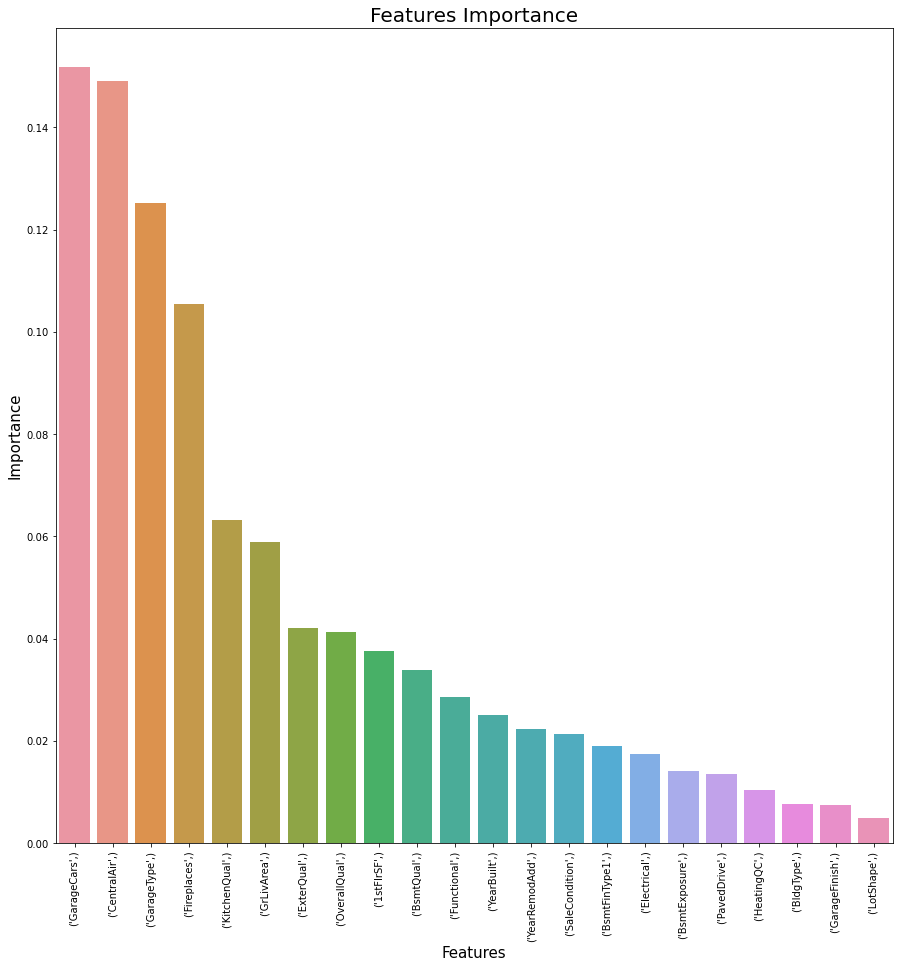

In [142]:
from xgboost import XGBRegressor

xgb_1 = XGBRegressor(n_estimators=1000,learning_rate=0.05,gamma=0,subsample=0.75,
                    max_depth=7,random_state=5,min_child_weight=1,colsample_bytree=0.8)

model_fit(xgb_1,X_train,y_train,X_test,y_test)

In [143]:
#Submission with XGBoosting 
xgb_prediction = xgb_1.predict(test_df)
xgb_prediction = np.exp(xgb_prediction)
xgb_prediction

array([ 93690.41,  94637.35, 116858.63, ...,  88038.  ,  79481.72,
       131099.81], dtype=float32)

# File Submission :

In [144]:
sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [145]:
sample_submission['SalePrice'] = xgb_prediction
sample_submission.to_csv("final_submission.csv",index = False)

In [146]:
sample_submission

,Id,SalePrice
0,1461,93690.406250
1,1462,94637.351562
2,1463,116858.632812
3,1464,114457.703125
4,1465,111085.054688
...,...,...
1454,2915,65110.699219
1455,2916,51091.402344
1456,2917,88038.000000
1457,2918,79481.718750


In [147]:
test_df.shape

(1459, 22)

# Thanks You for Reading !!

Its great for me that you have read this notebook and would like to know about yours feedback for improvements as i believe sharing of knowledge will make you more powerful. Also it will be a kind help to know your comments and please do upvote, thank you very much.

<img alt="Emoticon Thank You Stock Illustrations – 132 Emoticon Thank You ..." class="n3VNCb" src="https://thumbs.dreamstime.com/b/cute-blushing-yellow-emoticon-banner-illustration-thanks-quote-thank-you-greeting-card-concept-cute-yellow-d-smiley-face-159876347.jpg" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 381px; height: 162.877px; margin: 28.0613px 0px;">
